In [290]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
from matplotlib.pyplot import imshow
import pandas as pd
import seaborn as sb

### Load Data

In [242]:
numcat = 6 #number of categories
categories = ['AbdomenCT', 'BreastMRI', 'ChestCT', 'CXR', 'Hand', 'HeadCT']

In [243]:
# directory = r'./Medical_MNIST/'
# train, test = [], []
# for i in range(numcat):
#     imagearray = []
#     for image_raw in os.listdir(directory + categories[i]):
#         image_np = (np.array(Image.open(os.path.join(directory + categories[i], image_raw))).flatten())
#         image = np.append(image_np, i)
#         imagearray.append(image.astype('uint8'))
#     train += imagearray[0:int(0.8*len(imagearray))]
#     test += imagearray[int(0.8*len(imagearray)):]
# # data = np.array(imagearray)
# train = np.array(train)
# test = np.array(test)


In [244]:
# #saving data for faster loading in future
# np.save('Medical_train.npy', train)
# np.save('Medical_test.npy', test)

In [245]:
# For now we are using only a subset of train and test data
# trainsub = 40000
# testsub = 5000

In [246]:
train = np.load('Medical_train.npy')
test = np.load('Medical_test.npy')
#shuffle train and test sets
np.random.shuffle(train)
np.random.shuffle(test)
#splitting into x and y - for both train and test sets
# X_train, y_train = train[:trainsub, :-1], train[:trainsub, -1]
# X_test, y_test = test[:testsub, :-1], test[:testsub, -1]
X_train, y_train = train[:, :-1], train[:, -1]
X_test, y_test = test[:, :-1], test[:, -1]

In [247]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(47163, 4096) (47163,) (11791, 4096) (11791,)


### cross validation

In [248]:
# def cross_valid_split(dataset, folds):
#         dataset_split = []
# #         df_copy = dataset
#         fold_size = int(dataset.shape[0] // folds)
        
#         # for loop to save each fold
#         for i in range(folds):
#             fold = []
#             # while loop to add elements to the folds
#             while len(fold) < fold_size:
#                 # select a random element
#                 r = randrange(df_copy.shape[0])
#                 # determine the index of this element 
#                 index = df_copy.index[r]
#                 # save the randomly selected line 
#                 fold.append(df_copy.loc[index].values.tolist())
#                 # delete the randomly selected line from
#                 # dataframe not to select again
#                 df_copy = df_copy.drop(index)
#             # save the fold     
#             dataset_split.append(np.asarray(fold))
            
#         return dataset_split

In [249]:
# directory = r'./Medical_MNIST/'
# image_np = np.array(Image.open(os.path.join(directory + 'AbdomenCT', '000000.jpeg')))
# imshow(image_np/255, cmap = 'gray')
# # img.show()

### Data Visualization(PCA/tSNE)

Learnt the basics of PCA and tSNE from https://www.datacamp.com/community/tutorials/introduction-t-sne.
Code also adapted from the above website only

In [250]:
# def medical_scatter(x, colors):
#     '''Libraries use for this function ONLY'''
#     import matplotlib.patheffects as PathEffects
# #     %matplotlib inline

#     import seaborn as sns
#     '''------------------------------------'''
    
#     sns.set_style('darkgrid')
#     sns.set_palette('muted')
#     sns.set_context("notebook", font_scale=1.5,
#                     rc={"lines.linewidth": 2.5})
    
#     '''----------------------------------------'''
#     # choose a color palette with seaborn.
#     num_classes = len(np.unique(colors))
#     print('Number of unique classes are = {}'.format(num_classes))
#     palette = np.array(sns.color_palette("hls", num_classes))
# #     print(palette)
#     # create a scatter plot.
#     f = plt.figure(figsize=(12, 12))
#     ax = plt.subplot(aspect='equal')
#     sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
#     plt.xlim(-25, 25)
#     plt.ylim(-25, 25)
# #     ax.axis('off')
#     ax.axis('tight')

#     # add the labels for each digit corresponding to the label
#     txts = []

#     for i in range(num_classes):

#         # Position of each label at median of data points.
        
#         xtext, ytext = np.median(x[colors == i, :], axis=0)
# #         print(i, xtext, ytext)
#         txt = ax.text(xtext, ytext, str(i), fontsize=24)
#         txt.set_path_effects([
#             PathEffects.Stroke(linewidth=5, foreground="w"),
#             PathEffects.Normal()])
#         txts.append(txt)

#     return f, ax, sc, txts

### PCA - on full train dataset

In [251]:
# '''The following libraries used only for PCA/tSNE as we are allowed to do so'''
# from sklearn.decomposition import PCA
# import time 

# time_start = time.time()

# pca = PCA(n_components=4)
# pca_result = pca.fit_transform(X_train)

# print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))

__Performing the pca, we see that 58 percent of the variance in data is explained by two principle axis only__

In [252]:
# pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])

# pca_df['pca1'] = pca_result[:,0]
# pca_df['pca2'] = pca_result[:,1]
# pca_df['pca3'] = pca_result[:,2]
# pca_df['pca4'] = pca_result[:,3]

# print('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))

__visualization__

In [253]:
# top_two_comp = pca_df[['pca1','pca2']] # taking first and second principal component

# medical_scatter(top_two_comp.values,y_train) # Visualizing the PCA output

### tSNE

In [254]:
# #using a subset of the train data
# x_subset = X_train
# y_subset = y_train
# # x_subset = X_train[0:10000]
# # y_subset = y_train[0:10000]
# print(y_subset.shape)
# print(np.unique(y_subset))

In [255]:
# '''The following libraries used only for PCA/tSNE as we are allowed to do so'''
# from sklearn.manifold import TSNE
# import time
# time_start = time.time()

# medical_tsne = TSNE(random_state=2).fit_transform(x_subset)

# print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

In [256]:
# medical_scatter(medical_tsne, y_subset)

In [257]:
# print(medical_tsne.shape)

# Strategy 1: PCA
### Do PCA on full dataset (X_train + X_test combined) and get result in low dimension. Then on the obtained features carry out all algorithms like bayes, naive bayes etc etc

In [261]:
'''The following libraries used only for PCA/tSNE as we are allowed to do so'''
from sklearn.decomposition import PCA
import time 

time_start = time.time()

pca = PCA(n_components=4)
# print(X_train.shape)
# assert(np.concatenate((X_train,X_test), axis = 0).shape == (X_test.shape[0]+X_train.shape[0], X_test.shape[1]))
pca_result = pca.fit_transform(X_train)

print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))

PCA done! Time elapsed: 43.32866835594177 seconds


In [262]:
print(pca_result.shape)
print(pca_result[0:10])

(47163, 4)
[[-2532.78602821  -155.27708548  1231.97179592  -222.08964281]
 [-2722.09847457 -2203.49878297  -241.92459223  1657.01372813]
 [-4825.66717064  1283.80540494  -800.68509105  -332.89020327]
 [  929.67407124  1051.34987236    48.64450198   758.47118934]
 [-1485.48784961 -2672.42960111   965.88586105   980.26608595]
 [ 4065.61817997  -568.02804705 -2657.80349415  -310.04398753]
 [-2579.32108396   -10.29898681   922.0638608   -181.96157075]
 [ 4550.76824003 -1236.29263679 -1476.02979243  -479.25563452]
 [ 2541.83974176  1360.58137541   285.68348135   561.03619201]
 [-1998.61357951  -458.41596202  1766.01636535  -493.84618587]]


In [263]:
pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])

pca_df['pca1'] = pca_result[:,0]
pca_df['pca2'] = pca_result[:,1]
pca_df['pca3'] = pca_result[:,2]
pca_df['pca4'] = pca_result[:,3]

print('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))

Variance explained per principal component: [0.46913582 0.11218636 0.05130604 0.03566176]


In [266]:
#apply the pca transform to the test data

test_pca = pca.transform(X_test)

#we are doing it for 2 pca components only currently
#we will also normalize the data to make mean 0 and std 1 for the columns

def normalize(x):
    return (x-x.mean(axis = 0))/(x.std(axis = 0))

X_train_pca = normalize(top_two_comp.values)
X_test_pca = normalize(test_pca[:,[0,1]])

#NOTE:Y_train and y_test remain same as before
print(X_train_pca.shape, X_test_pca.shape)
print(X_train_pca.mean(axis = 0))
# print(X_train_pca[0:10])

(47163, 2) (11791, 2)
[-1.92840723e-17 -1.98866996e-17]


Number of unique classes are = 6


(<Figure size 864x864 with 1 Axes>,
 [Text(1230.238266313433, 1053.1815239436396, '0'),
  Text(-4328.753079570709, 1206.0462135354612, '1'),
  Text(2433.800936786606, 1357.6072545334086, '2'),
  Text(3944.6032570808875, -1276.4744954314403, '3'),
  Text(-1991.8216056746992, -2440.96551899674, '4'),
  Text(-2220.3634184341627, -77.02381738804135, '5')])

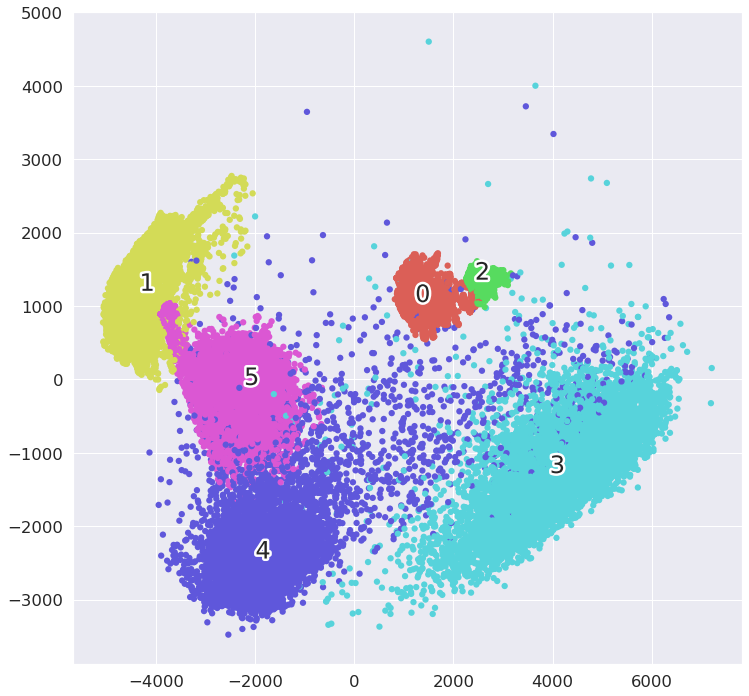

In [268]:
top_two_comp = pca_df[['pca1','pca2']] # taking first and second principal component

medical_scatter(top_two_comp.values,y_train) # Visualizing the PCA outputa

# Naive Bayes Classifier on PCA data - with Gaussian or some other density functions as density estimates of individual features for a particular class

### MLE

In [333]:
def get_naive_params(X, y):
    params = []
    for i in range(numcat):
        mu = np.mean(X[np.where(y == i)], axis = 0)
        var = np.var(X[np.where(y == i)], axis = 0)
#         print(mu.shape, var.shape)
        assert(mu.shape == var.shape and mu.shape == (X.shape[1],))
        params.append({'mu':mu, 'var':var})
    return params

def performance_metrics_multiclass(y_pred_test, y_test, num_class):
    '''gives the TPR, FPR, acc, precision, recall and F1 score for all classes by comparing the 2 input arrays'''
    #First we calculate the confusion matrix of size num_class*num_class
    #NOTE: Y axis of matrix will be predicted class and x axis wll be true class
    conf_mat = np.zeros((num_class, num_class))
    
    for i in range(num_class):
        for j in range(num_class):
            conf_mat[i, j] = np.logical_and(y_pred_test == i, y_test ==j).sum()
    # Calculating precision, recall, F1 Score for each class
    colnames = ['class', 'Precision', 'Recall', 'F1']
    df = pd.DataFrame(columns = colnames)
    for i in range(num_class):
        TP = conf_mat[i, i]
        FP = conf_mat[i].sum() - conf_mat[i, i]
        TN = conf_mat.sum() - conf_mat[i].sum() - conf_mat[:, i].sum() +  conf_mat[i, i]
        FN = conf_mat[:, i].sum() - conf_mat[i, i]
        P = (TP)/(TP+FP)
        R = (TP)/(TP+FN)
        F1 = 2*P*R/(P+R)
        df = df.append({'class':categories[i], 'Precision':P, 'Recall':R, 'F1':F1 }, ignore_index = True)
    macroF1 = df['F1'].mean()
    accuracy = (y_pred_test==y_test).mean()
    
    # NOTE : returning the transpose of the confusion matricx to get true labels on the y axis
    conf_mat = conf_mat.T
    # NORMALIZING the confusion matrix
    conf_mat = np.around(conf_mat/(conf_mat.sum(axis = 1)), decimals = 3)
    
    
    #PLot the matrix
    ax = sb.heatmap(conf_mat, cmap = sb.light_palette("seagreen", as_cmap=True), xticklabels = categories, yticklabels = categories, annot = True, annot_kws={"size": 10})
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()
    return conf_mat, df, macroF1, accuracy

def getpriors(y_train):
#     priors = [X_train_0.shape[0]/(X_train_1.shape[0] + X_train_0.shape[0]), X_train_1.shape[0]/(X_train_1.shape[0] + X_train_0.shape[0])]
    priors = [(y_train==i).sum()/y_train.shape[0] for i in range(6)]
        
    return priors

def gaussian_univariate(x, mu, var):
    """ to get the value of pdf having scalar params mu and var, @x """
    diff = (x - mu)
    pdf_x = (1/(np.sqrt(2*np.pi)))* (1/np.sqrt(var)) * (np.exp(-0.5*(diff**2)/(var)))
    return pdf_x.item()

def naive_likelihood(x, mu_array, var_array):
    '''mu_array, and var_array are d dimensional array where d is the size of x which is the number of features'''
    likelihood = 1
    for i in range(x.shape[0]):
        likelihood = likelihood * gaussian_univariate(x[i], mu_array[i], var_array[i])
    
    return likelihood
        
def predict_naive(X_test, priors, naive_params):
    y_pred_test = np.zeros((X_test.shape[0],))
    for i in range(X_test.shape[0]):
        maxpost = 0
        for j in range(numcat):
            assert(X_test[i].shape == (X_test.shape[1],))
            lik = naive_likelihood(X_test[i], naive_params[j]['mu'], naive_params[j]['var'])
            post_j = priors[j]*lik
            if(post_j>maxpost):
                maxpost = post_j
                y_pred_test[i] = j
    return y_pred_test

In [334]:
# print((y_test<=6).sum())
# print(np.where(X_test_pca[:,0]>=0))

## Cross Validating Naive Bayes

## Testing for Naive Bayes

In [339]:
priors_naive = getpriors(y_train)
naive_params = get_naive_params(X_train_pca, y_train)

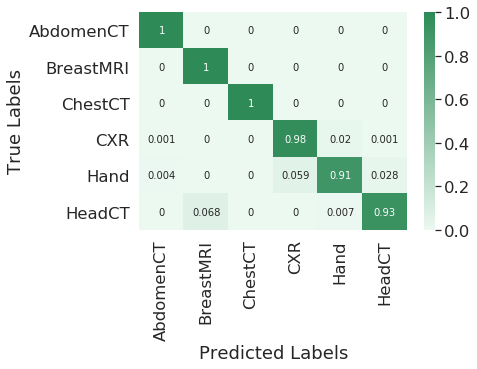

Macro F1 = 0.9690688263572058, Accuracy = 0.969298617589687


,class,Precision,Recall,F1
0,AbdomenCT,0.995025,1.0000,0.997506
1,BreastMRI,0.936715,1.0000,0.967324
2,ChestCT,0.999500,1.0000,0.999750
3,CXR,0.943078,0.9775,0.959980
4,Hand,0.970635,0.9090,0.938807
5,HeadCT,0.970343,0.9325,0.951045


In [338]:
# y_pred_train_naive = predict_naive(X_train_pca, priors_naive, naive_params)
y_pred_test_naive = predict_naive(X_test_pca, priors_naive, naive_params)
conf_mat, stats_df, macroF1, accuracy = performance_metrics_multiclass(y_pred_test_naive, y_test, numcat)
print('Macro F1 = {}, Accuracy = {}'.format(macroF1, accuracy))
stats_df

### MAP

# Bayes Classifier - with (multivariate) Gaussian as class conditional densities

TODO : 1.MLE, 2.MAP

### MLE: 

In [356]:
def gaussian_multivariate(x, mu, sigma):
    """ to get the value of pdf having params mu and sigma, @x """
    dim = len(x)
    diff = (x - mu).reshape((-1,1))
    pdf_x = (1/((np.sqrt(2*np.pi))**dim))* (1/np.sqrt(np.linalg.det(sigma))) * (np.exp(-0.5*(diff.T).dot(np.linalg.inv(sigma).dot(diff))))
    return pdf_x.item()

def get_normal(X, y):
    params = []
    for i in range(numcat):
        mu = np.mean(X[np.where(y == i)], axis = 0)
        sigma = np.cov(X[np.where(y == i)].T)
        params.append({'mu':mu, 'sigma':sigma})
    return params
    
def predict_normal(X_test, priors, norm_params):
    y_pred_test = np.zeros((X_test.shape[0],))
    for i in range(X_test.shape[0]):
        maxpost = 0
        for j in range(numcat):
            lik =  gaussian_multivariate(X_test[i], norm_params[j]['mu'], norm_params[j]['sigma'])
            post_j = priors[j]*lik
            if(post_j>maxpost):
                maxpost = post_j
                y_pred_test[i] = j
    return y_pred_test

## Cross Validating Bayes

## Testing Bayes

In [357]:
priors_multivariate =  getpriors(y_train)
norm_params = get_normal(X_train_pca, y_train)

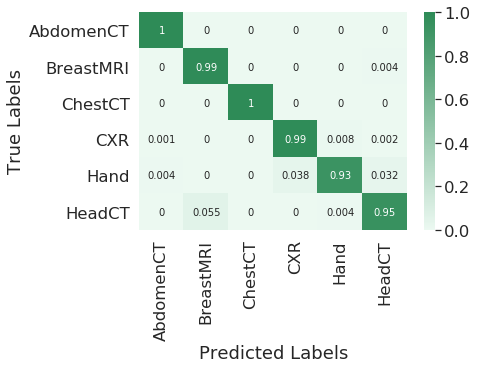

Macro F1 = 0.9755298609296794, Accuracy = 0.9757442116868799


,class,Precision,Recall,F1
0,AbdomenCT,0.995520,1.000000,0.997755
1,BreastMRI,0.947368,0.994975,0.970588
2,ChestCT,0.999500,1.000000,0.999750
3,CXR,0.963017,0.989500,0.976079
4,Hand,0.986681,0.926000,0.955378
5,HeadCT,0.961382,0.946000,0.953629


In [359]:
y_pred_test_normal = predict_normal(X_test_pca, priors_multivariate, norm_params)
conf_mat_norm, stats_df_norm, macroF1_norm, accuracy_norm = performance_metrics_multiclass(y_pred_test_normal, y_test, numcat)
print('Macro F1 = {}, Accuracy = {}'.format(macroF1_norm, accuracy_norm))
stats_df_norm


# Bayes Classifier - with GMM as class conditional densities

### Useful functions (EM algorithm and other functions for support)

In [423]:
# Fro this we will use a subset of dataset to make it computationally tractable
n = 25
X_train_gmm = X_train_pca[0:X_train_pca.shape[0]//n]
y_train_gmm = y_train[0:X_train_pca.shape[0]//n]
X_test_gmm = X_test_pca[0:X_test_pca.shape[0]//n]
y_test_gmm = y_test[0:X_test_pca.shape[0]//n]

In [424]:
def random_params(k, data):
    pi = np.ones(k)*(1.0/k)
    cols = data.shape[1]
    mu = np.zeros((k, cols))    #mean of k clusters
    for k_ in range(k):
        randnum = np.floor(np.random.random()*len(data))
        for col in range(cols):
            mu[k_][col] += (data[int(randnum)][col])
    
    sigma = []
    #Initializing sigma as covariance of data only for all gaussians
    for i in range(k):
        sigma.append(np.cov(data.T))
    sigma = np.array(sigma)
    
    return pi, mu, sigma


def likelihood(x, pi, mu, sigma, k):
    sum = 0.
    for k_ in range(k):
        sum += pi[k_]*gaussian_multivariate(x, mu[k_], sigma[k_])
    
    return sum.item()

                
def Estep(pi, mu, sigma, k, data):
    N = data.shape[0]
    mem_wts = np.zeros((N, k))
    #storing member weights in an N*k matrix
    for k_ in range(k):
        for n in range(N):
            mem_wts[n,k_] = pi[k_]*gaussian_multivariate(data[n], mu[k_], sigma[k_])/(likelihood(data[n], pi, mu, sigma, k))      
                
    return mem_wts

def Mstep(mem_wts, k, data):
    N = data.shape[0]
    columns = data.shape[1]    
    mu = np.zeros((k, columns))
    sigma = np.zeros((k, columns, columns))
    pi = np.zeros(k)
    for k_ in range(k):
        mem_wts_k_ = mem_wts[:,k_].reshape(N, 1)
        Nk_ = mem_wts_k_.sum()
        pi[k_] = (Nk_)/N
        mu[k_] = (1/Nk_)*(((mem_wts_k_.T).dot(data)).sum(axis=0))
    
    for k_ in range(k):
        mem_wts_k_ = mem_wts[:,k_].reshape(N, 1)
        Nk_ = mem_wts_k_.sum()
        for n in range(N):
            diff = (data[n] - mu[k_]).reshape((-1,1))
            sigma[k_] += (mem_wts_k_[n,0])*(diff.dot(diff.T))
        sigma[k_] /= Nk_
        assert(sigma[k_].shape==(columns,columns))
                
    return pi, mu, sigma

def log_lik(pi, mu, sigma, k, data):
    log_lik = 0.
    
    for n in range(data.shape[0]):
#         print(likelihood(data[n], pi, mu, sigma, k))
        log_lik += np.log(likelihood(data[n], pi, mu, sigma, k))
    return log_lik

def EM(data, k, thresh, iter_max):
#     initialize array - pi, mu, sigmas having parameters for all the gaussians (k in number)
#     print(data[1].shape)
    pi, mu, sigma = random_params(k, data)
    log_lik_list = []
    log_lik_curr = log_lik(pi, mu, sigma, k, data)
    
    for i in range(iter_max):
        log_lik_list.append(log_lik_curr)
        if(i%10 == 0):
            print("iteration     |    {}    |     LogLikelihood = {}".format(i, log_lik_curr))
        mem_wts = Estep(pi, mu, sigma, k, data) #membership weights calculated in the E step
        pi, mu, sigma = Mstep(mem_wts, k, data) #used the membership weights to get new pi, mu, sigma
        
        #calculate new log likelihood
        log_lik_new = log_lik(pi, mu, sigma, k, data)
        
#         check if model has converged
        if(abs(log_lik_new-log_lik_curr) < thresh):
            break
        
        #update log likelihood
        log_lik_curr = log_lik_new
    
    print("EM completed")
    plt.plot(log_lik_list)
    plt.ylabel('Log_Likelihood')
    plt.xlabel('Iterations')
    plt.title('Log_likelihood vs number of iterations in EM algorithm')
    plt.show()
    print('Final log likelihood = {}'.format(log_lik_curr))
    return {'pi':pi, 'mu':mu, 'sigma':sigma}

def prediction_gmm(X_test, priors, gmm_params, num_gauss):
    y_pred_test = np.zeros((X_test.shape[0],))
#     print(thresh)
    for i in range(X_test.shape[0]):
        maxpost = 0
        for j in range(numcat):
            lik = likelihood(X_test[i], gmm_params[j]['pi'], gmm_params[j]['mu'], gmm_params[j]['sigma'], num_gauss)
            post_j = priors[j]*lik
            if(post_j>maxpost):
                maxpost = post_j
                y_pred_test[i] = j            
    return y_pred_test

def get_gmm_params(X_train, y_train, num_gauss, iter_max, stop_thresh):
    '''Function that takes input hyperparameters, along with training data to give out the parameters for GMM'''
    gmm_params = []
    for i in range(numcat):
        gmm_params_i = EM(X_train[np.where(y_train==i)], num_gauss, thresh, iter_max)
        gmm_params.append(gmm_params_i)
    
    return gmm_params

### Modelling Class conditional densities as Sum of 4 gaussians

iteration     |    0    |     LogLikelihood = 401.73433171075226
iteration     |    10    |     LogLikelihood = 570.8208342810999
iteration     |    20    |     LogLikelihood = 575.9595529682193
iteration     |    30    |     LogLikelihood = 578.0917133035206
iteration     |    40    |     LogLikelihood = 578.7074074288823
iteration     |    50    |     LogLikelihood = 578.7873964945844
iteration     |    60    |     LogLikelihood = 578.8641894182053
iteration     |    70    |     LogLikelihood = 578.9451788469897
iteration     |    80    |     LogLikelihood = 579.0267965662536
iteration     |    90    |     LogLikelihood = 579.1026866901457
EM completed


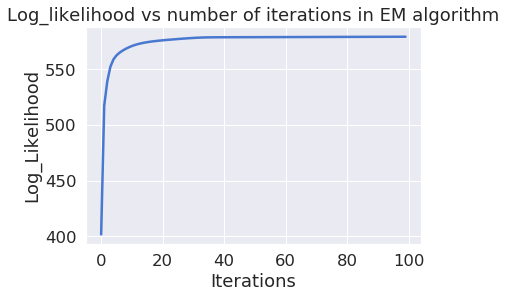

Final log likelihood = 579.1664268628139
iteration     |    0    |     LogLikelihood = -93.41720239939718
iteration     |    10    |     LogLikelihood = 124.61516595494555
iteration     |    20    |     LogLikelihood = 125.62032550114361
iteration     |    30    |     LogLikelihood = 125.68370505276744
iteration     |    40    |     LogLikelihood = 125.74437039492474
iteration     |    50    |     LogLikelihood = 125.82560014381174
iteration     |    60    |     LogLikelihood = 125.93519243612039
iteration     |    70    |     LogLikelihood = 126.08657954009668
iteration     |    80    |     LogLikelihood = 126.30085315722022
iteration     |    90    |     LogLikelihood = 126.59563068539127
EM completed


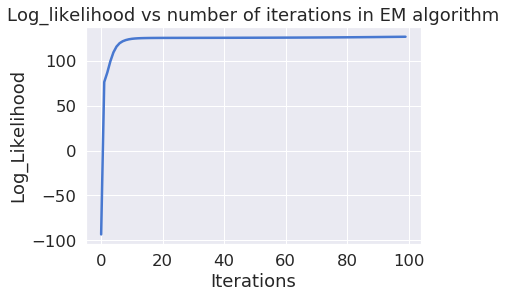

Final log likelihood = 126.95349005366721
iteration     |    0    |     LogLikelihood = 1147.8960459639366
iteration     |    10    |     LogLikelihood = 1305.6097132648986
iteration     |    20    |     LogLikelihood = 1314.0453773573422
iteration     |    30    |     LogLikelihood = 1315.7191803191095
iteration     |    40    |     LogLikelihood = 1316.2070956355547
iteration     |    50    |     LogLikelihood = 1316.5600412018061
iteration     |    60    |     LogLikelihood = 1317.0022249595477
iteration     |    70    |     LogLikelihood = 1317.6365626540514
iteration     |    80    |     LogLikelihood = 1318.2234501013402
iteration     |    90    |     LogLikelihood = 1318.7992352501767
EM completed


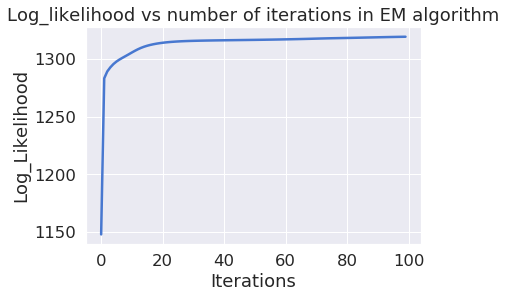

Final log likelihood = 1319.30940201275
iteration     |    0    |     LogLikelihood = -493.582042693164


/home/harman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """
/home/harman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
/home/harman/anaconda3/lib/python3.7/site-packages/numpy/linalg/linalg.py:2116: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


iteration     |    10    |     LogLikelihood = nan
iteration     |    20    |     LogLikelihood = nan
iteration     |    30    |     LogLikelihood = nan
iteration     |    40    |     LogLikelihood = nan
iteration     |    50    |     LogLikelihood = nan
iteration     |    60    |     LogLikelihood = nan
iteration     |    70    |     LogLikelihood = nan
iteration     |    80    |     LogLikelihood = nan
iteration     |    90    |     LogLikelihood = nan
EM completed


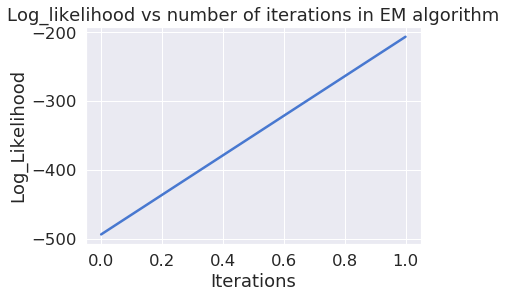

Final log likelihood = nan
iteration     |    0    |     LogLikelihood = -400.0938980424366
iteration     |    10    |     LogLikelihood = -121.72593470363272
iteration     |    20    |     LogLikelihood = -106.33063218241037
iteration     |    30    |     LogLikelihood = -90.43828385399881
iteration     |    40    |     LogLikelihood = -87.97551970854339
iteration     |    50    |     LogLikelihood = -86.60054369347483
iteration     |    60    |     LogLikelihood = -83.45099763250839
iteration     |    70    |     LogLikelihood = -83.44617074693815
iteration     |    80    |     LogLikelihood = -83.44376020746469
EM completed


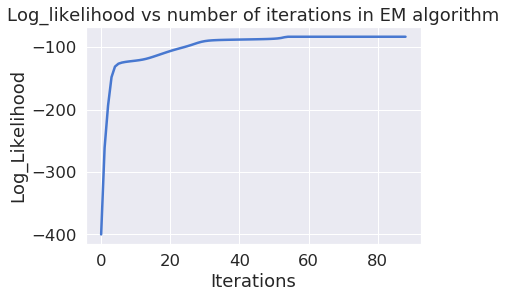

Final log likelihood = -83.4427117686822
iteration     |    0    |     LogLikelihood = -140.35552904671542
iteration     |    10    |     LogLikelihood = 96.5331462618172
iteration     |    20    |     LogLikelihood = 98.2223823533769
iteration     |    30    |     LogLikelihood = 99.57243494070728
iteration     |    40    |     LogLikelihood = 100.493708036228
iteration     |    50    |     LogLikelihood = 100.88403601142537
iteration     |    60    |     LogLikelihood = 101.11942366563115
iteration     |    70    |     LogLikelihood = 101.365034922449
iteration     |    80    |     LogLikelihood = 101.62188494891544
iteration     |    90    |     LogLikelihood = 101.93622214591079
EM completed


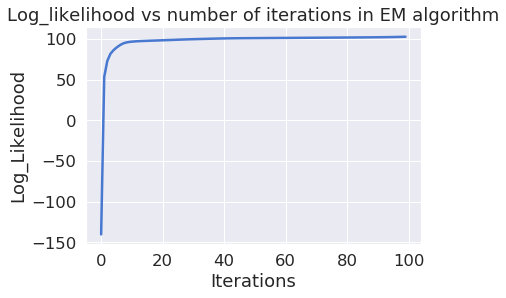

Final log likelihood = 102.68218831808953


In [427]:
# for classifying test data we first model all the classes of the train data
gmm_params = get_gmm_params(X_train_gmm, y_train_gmm, num_gauss = 4, iter_max = 100, stop_thresh = 0.0001)

### Some more helpful funcions to calculate performance of the model

## Performance of GMM 
For 4 gaussians here, more experiments done afterwards

/home/harman/anaconda3/lib/python3.7/site-packages/numpy/linalg/linalg.py:2116: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/home/harman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars


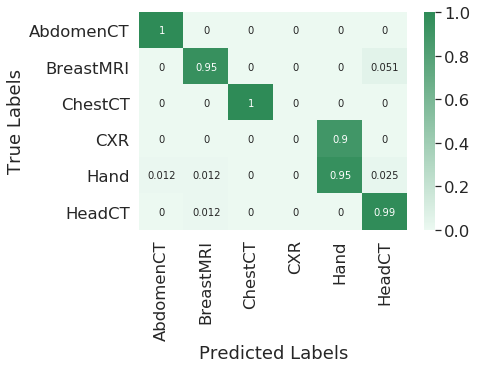

Macro F1 = 0.9164384120437491, Accuracy = 0.8131634819532909


,class,Precision,Recall,F1
0,AbdomenCT,0.987654,1.000000,0.993789
1,BreastMRI,0.974359,0.950000,0.962025
2,ChestCT,1.000000,1.000000,1.000000
3,CXR,NaN,0.000000,NaN
4,Hand,0.515337,0.954545,0.669323
5,HeadCT,0.928571,0.987342,0.957055


In [428]:
priors_GMM = getpriors(y_train_gmm)
y_pred_test_gmm = prediction_gmm(X_test_gmm, priors_GMM, gmm_params, num_gauss = 4)
conf_mat_norm_gmm, stats_df_norm_gmm, macroF1_norm_gmm, accuracy_norm_gmm = performance_metrics_multiclass(y_pred_test_gmm, y_test_gmm, numcat)
print('Macro F1 = {}, Accuracy = {}'.format(macroF1_norm_gmm, accuracy_norm_gmm))
stats_df_norm_gmm

### Bias Variance curve while changing the number of gaussians for gmm
Note: the code will take time to run

iteration     |    0    |     LogLikelihood = -2096.2019515894362
EM completed


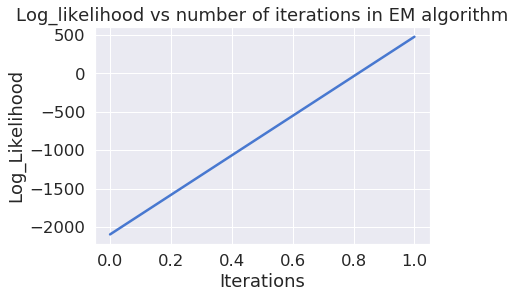

Final log likelihood = 473.75594142882653
iteration     |    0    |     LogLikelihood = -395.3765994843081
EM completed


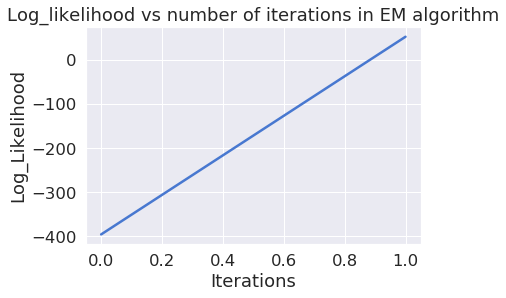

Final log likelihood = 52.563622789782684
iteration     |    0    |     LogLikelihood = 1224.5749078241004
EM completed


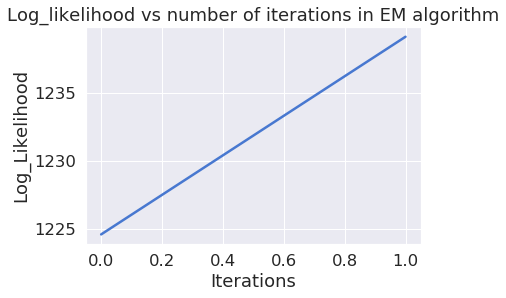

Final log likelihood = 1239.1519112504138
iteration     |    0    |     LogLikelihood = -355.3850262128498
EM completed


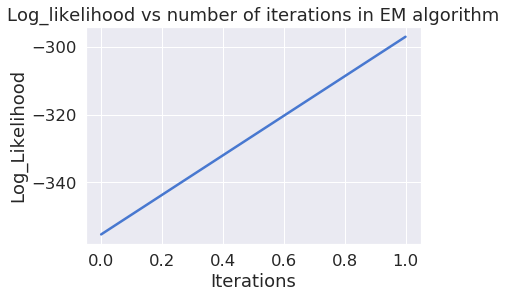

Final log likelihood = -297.0404751141191
iteration     |    0    |     LogLikelihood = -490.46124964787
EM completed


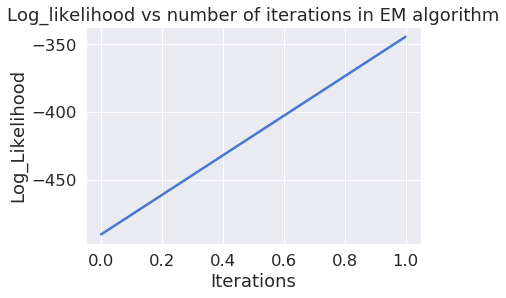

Final log likelihood = -344.3835516473133
iteration     |    0    |     LogLikelihood = -722.3932057778123
EM completed


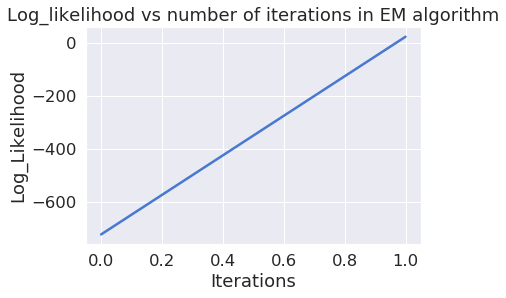

Final log likelihood = 22.955997450160634


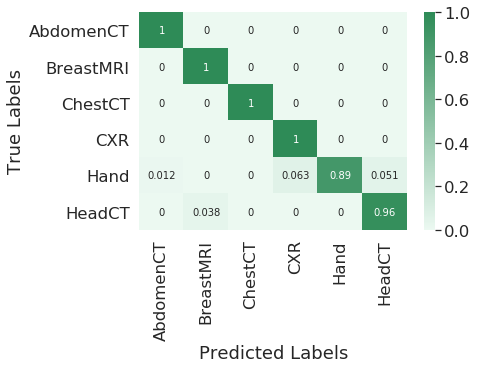

Macro F1 = 0.9734071573644038, Accuracy = 0.9723991507430998


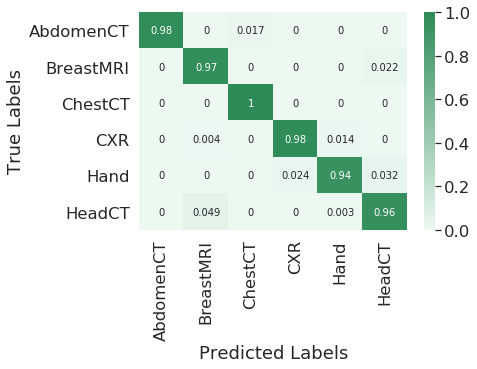

Macro F1 = 0.9725538080932817, Accuracy = 0.9734888653234358
iteration     |    0    |     LogLikelihood = 424.36981475117625
iteration     |    10    |     LogLikelihood = 530.3225755951023
iteration     |    20    |     LogLikelihood = 530.5441630468297
iteration     |    30    |     LogLikelihood = 530.6639542601497
iteration     |    40    |     LogLikelihood = 530.7333321117204
iteration     |    50    |     LogLikelihood = 530.7749791729456
iteration     |    60    |     LogLikelihood = 530.8022874264782
iteration     |    70    |     LogLikelihood = 530.8231345145216
iteration     |    80    |     LogLikelihood = 530.8428903390203
iteration     |    90    |     LogLikelihood = 530.8675657209717
EM completed


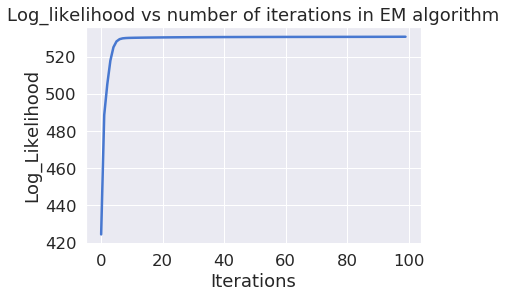

Final log likelihood = 530.911107409331
iteration     |    0    |     LogLikelihood = -197.2615051402408
iteration     |    10    |     LogLikelihood = 102.9407539874692
iteration     |    20    |     LogLikelihood = 106.5182902948806
iteration     |    30    |     LogLikelihood = 106.91135078233734
iteration     |    40    |     LogLikelihood = 106.95176810262174
iteration     |    50    |     LogLikelihood = 106.95604656615578
EM completed


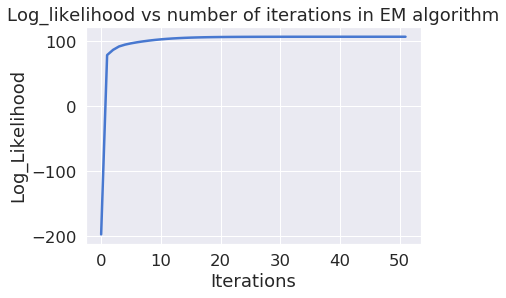

Final log likelihood = 106.95614938517159
iteration     |    0    |     LogLikelihood = 1134.2205634868378
iteration     |    10    |     LogLikelihood = 1281.6957660930213
iteration     |    20    |     LogLikelihood = 1297.4229391385293
iteration     |    30    |     LogLikelihood = 1297.8820069289081
iteration     |    40    |     LogLikelihood = 1297.979070145078
iteration     |    50    |     LogLikelihood = 1298.002545440359
iteration     |    60    |     LogLikelihood = 1298.0084687434241
EM completed


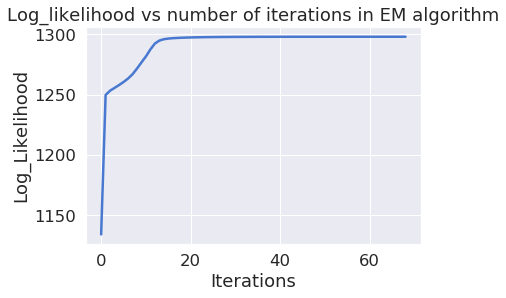

Final log likelihood = 1298.0098215060134
iteration     |    0    |     LogLikelihood = -775.6837690532536
iteration     |    10    |     LogLikelihood = -221.9495266525753
iteration     |    20    |     LogLikelihood = -210.0719769000001
iteration     |    30    |     LogLikelihood = -207.03368187781595
iteration     |    40    |     LogLikelihood = -206.30673603221226
iteration     |    50    |     LogLikelihood = -206.18123147251154
iteration     |    60    |     LogLikelihood = -206.1703215714198
EM completed


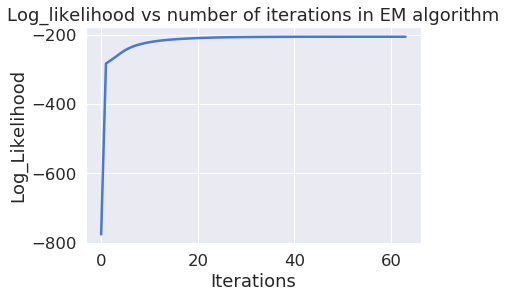

Final log likelihood = -206.16986746653146
iteration     |    0    |     LogLikelihood = -441.5584506969279
iteration     |    10    |     LogLikelihood = -133.04876943299502
iteration     |    20    |     LogLikelihood = -131.7287516209685
EM completed


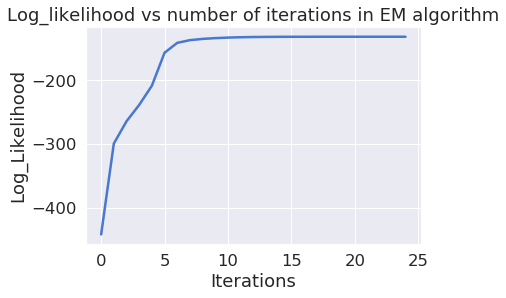

Final log likelihood = -131.726573150391
iteration     |    0    |     LogLikelihood = -359.75038301119633
iteration     |    10    |     LogLikelihood = 66.19637577310142
iteration     |    20    |     LogLikelihood = 67.16392017670557
iteration     |    30    |     LogLikelihood = 67.50942712609121
iteration     |    40    |     LogLikelihood = 68.3525695924166
iteration     |    50    |     LogLikelihood = 86.22212882591074
iteration     |    60    |     LogLikelihood = 88.0501891091291
EM completed


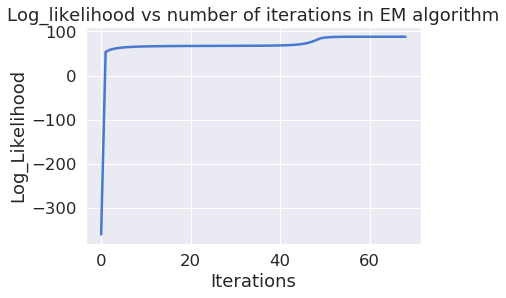

Final log likelihood = 88.05665612352429


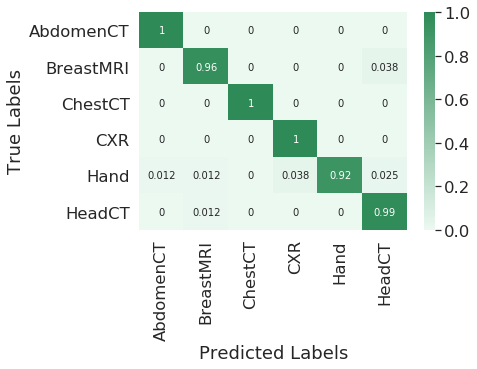

Macro F1 = 0.977541930540395, Accuracy = 0.9766454352441614


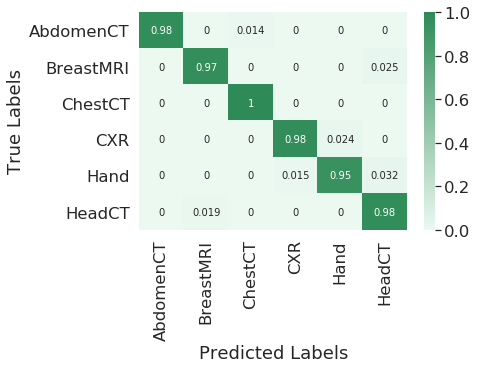

Macro F1 = 0.9782027663396183, Accuracy = 0.9787910922587487
iteration     |    0    |     LogLikelihood = 438.7439729845514
iteration     |    10    |     LogLikelihood = 553.4528448933007
iteration     |    20    |     LogLikelihood = 556.6247217870014
iteration     |    30    |     LogLikelihood = 558.192595961455
iteration     |    40    |     LogLikelihood = 558.460158850562
iteration     |    50    |     LogLikelihood = 558.5166553710621
iteration     |    60    |     LogLikelihood = 558.5328677799324
iteration     |    70    |     LogLikelihood = 558.5379727682893
iteration     |    80    |     LogLikelihood = 558.5396854281403
EM completed


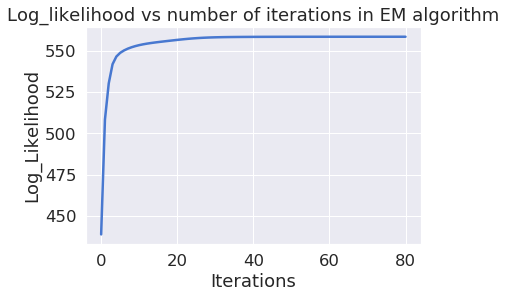

Final log likelihood = 558.5396854281403
iteration     |    0    |     LogLikelihood = -21.82236410805766
iteration     |    10    |     LogLikelihood = 114.74788644935772
iteration     |    20    |     LogLikelihood = 116.50733512333534
iteration     |    30    |     LogLikelihood = 117.3917546881107
iteration     |    40    |     LogLikelihood = 117.68570262006895
iteration     |    50    |     LogLikelihood = 117.73943365939357
iteration     |    60    |     LogLikelihood = 117.74825487016717
EM completed


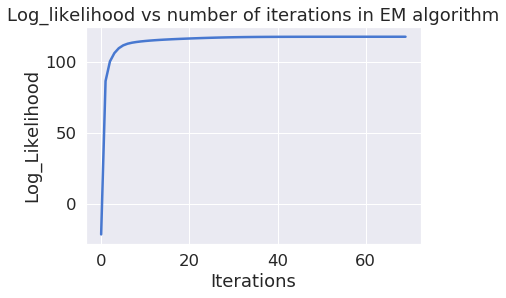

Final log likelihood = 117.75001023612356
iteration     |    0    |     LogLikelihood = 1035.3323322652202
iteration     |    10    |     LogLikelihood = 1311.585031238214
iteration     |    20    |     LogLikelihood = 1312.88672620666
iteration     |    30    |     LogLikelihood = 1313.3689643170646
iteration     |    40    |     LogLikelihood = 1313.5759613139862
iteration     |    50    |     LogLikelihood = 1313.6524498749961
iteration     |    60    |     LogLikelihood = 1313.6850737354052
iteration     |    70    |     LogLikelihood = 1313.7131042760545
iteration     |    80    |     LogLikelihood = 1313.8073726219504
iteration     |    90    |     LogLikelihood = 1314.050432746985
EM completed


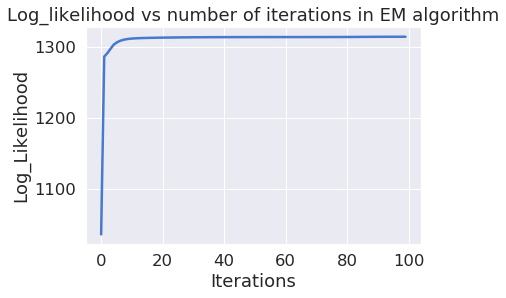

Final log likelihood = 1314.1490002806588
iteration     |    0    |     LogLikelihood = -516.8289415952337
iteration     |    10    |     LogLikelihood = -217.87647358308342
iteration     |    20    |     LogLikelihood = -209.1046209770687
iteration     |    30    |     LogLikelihood = -206.83362716784148
iteration     |    40    |     LogLikelihood = -206.26233024774206
iteration     |    50    |     LogLikelihood = -206.1769667637076
iteration     |    60    |     LogLikelihood = -206.17001801112062
EM completed


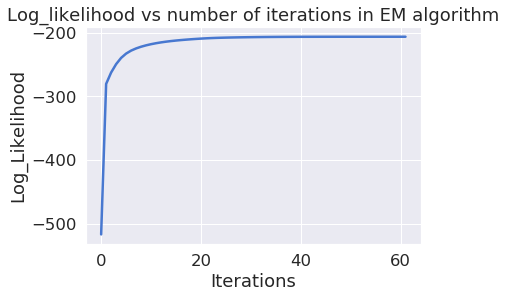

Final log likelihood = -206.16989611973838
iteration     |    0    |     LogLikelihood = -370.30192369478823
iteration     |    10    |     LogLikelihood = -117.92980118834431
iteration     |    20    |     LogLikelihood = -97.3835655682253
iteration     |    30    |     LogLikelihood = -94.62086941652375
iteration     |    40    |     LogLikelihood = -94.61140937038329
iteration     |    50    |     LogLikelihood = -94.6087357496376
EM completed


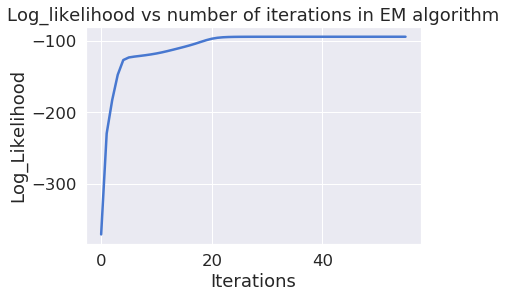

Final log likelihood = -94.6081084164501
iteration     |    0    |     LogLikelihood = -98.83488027594275
iteration     |    10    |     LogLikelihood = 74.19586342482869
iteration     |    20    |     LogLikelihood = 78.0731484912727
iteration     |    30    |     LogLikelihood = 79.83446086512532
iteration     |    40    |     LogLikelihood = 86.33338463809253
iteration     |    50    |     LogLikelihood = 95.81607890763344
iteration     |    60    |     LogLikelihood = 96.15054585488984
iteration     |    70    |     LogLikelihood = 96.19452986982675
iteration     |    80    |     LogLikelihood = 96.206718373092
iteration     |    90    |     LogLikelihood = 96.2181068828324
EM completed


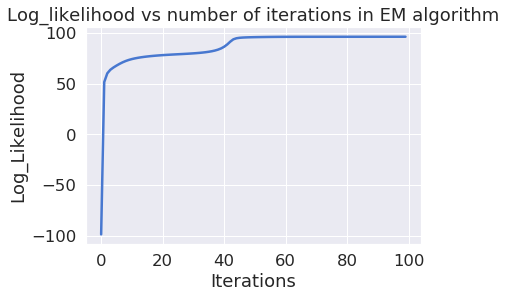

Final log likelihood = 96.22919380454267


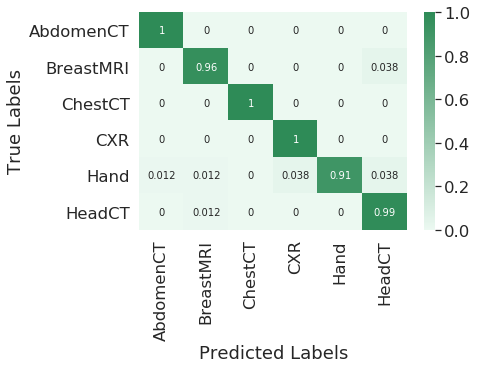

Macro F1 = 0.9755241509545801, Accuracy = 0.9745222929936306


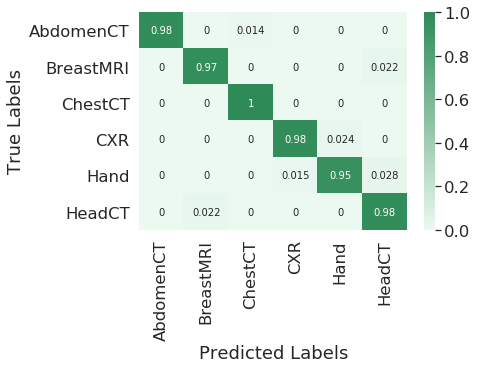

Macro F1 = 0.9787465949023447, Accuracy = 0.9793213149522799
iteration     |    0    |     LogLikelihood = 374.6471058531765
iteration     |    10    |     LogLikelihood = 580.2665234465264
iteration     |    20    |     LogLikelihood = 585.3658086842103
iteration     |    30    |     LogLikelihood = 586.0123639444628
iteration     |    40    |     LogLikelihood = 586.3329269195359
iteration     |    50    |     LogLikelihood = 586.5309719257872
iteration     |    60    |     LogLikelihood = 586.6728239368263
iteration     |    70    |     LogLikelihood = 586.8000107536405
iteration     |    80    |     LogLikelihood = 586.9314377766198
iteration     |    90    |     LogLikelihood = 587.0799429684383
EM completed


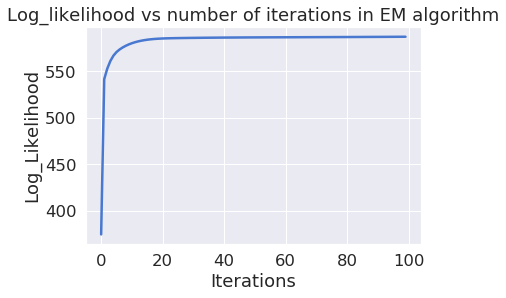

Final log likelihood = 587.2553738187041
iteration     |    0    |     LogLikelihood = -58.240549496635666
iteration     |    10    |     LogLikelihood = 119.95455882297708
iteration     |    20    |     LogLikelihood = 122.65055559258802
iteration     |    30    |     LogLikelihood = 124.11063319434629
iteration     |    40    |     LogLikelihood = 124.90380845398049
iteration     |    50    |     LogLikelihood = 125.65528283591175
iteration     |    60    |     LogLikelihood = 127.72675694014877
iteration     |    70    |     LogLikelihood = 130.63448627345377
iteration     |    80    |     LogLikelihood = 130.7357658572553
iteration     |    90    |     LogLikelihood = 130.91916530141998
EM completed


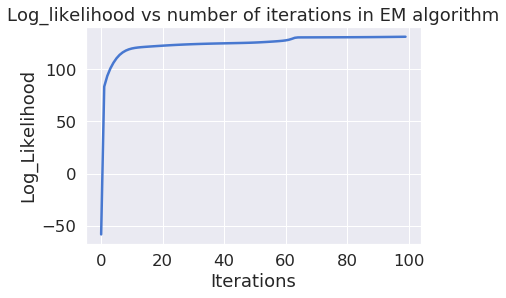

Final log likelihood = 131.2550074313347
iteration     |    0    |     LogLikelihood = 1127.7245613168495
iteration     |    10    |     LogLikelihood = 1307.10776315938
iteration     |    20    |     LogLikelihood = 1315.2379195716187
iteration     |    30    |     LogLikelihood = 1318.6547344097119
iteration     |    40    |     LogLikelihood = 1320.047291291376
iteration     |    50    |     LogLikelihood = 1320.9968599048646
iteration     |    60    |     LogLikelihood = 1321.9881467197977
iteration     |    70    |     LogLikelihood = 1323.6465709079987
iteration     |    80    |     LogLikelihood = 1325.8303228463108
iteration     |    90    |     LogLikelihood = 1328.4869460634573
EM completed


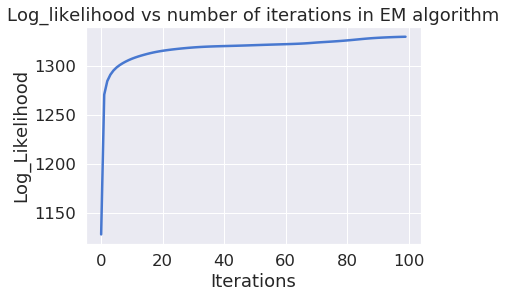

Final log likelihood = 1329.6466393332328
iteration     |    0    |     LogLikelihood = -404.25509948671163
iteration     |    10    |     LogLikelihood = -178.8991537748644
iteration     |    20    |     LogLikelihood = -176.62841356798626
iteration     |    30    |     LogLikelihood = -172.3703836526823
iteration     |    40    |     LogLikelihood = -167.2950888922727
iteration     |    50    |     LogLikelihood = -166.59359342785166
iteration     |    60    |     LogLikelihood = -166.10477397615068
iteration     |    70    |     LogLikelihood = -165.72931960842197
iteration     |    80    |     LogLikelihood = -165.4894266425319
iteration     |    90    |     LogLikelihood = -165.35859008906232
EM completed


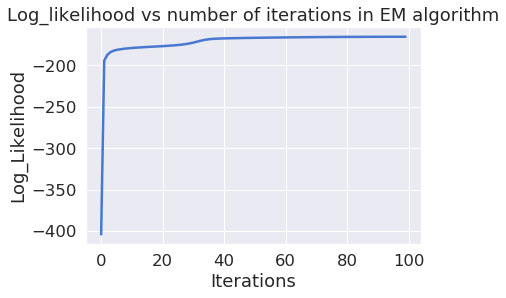

Final log likelihood = -165.28849549764237
iteration     |    0    |     LogLikelihood = -394.68986949224876
iteration     |    10    |     LogLikelihood = -95.03992084643991
iteration     |    20    |     LogLikelihood = -89.74149322849355
iteration     |    30    |     LogLikelihood = -88.40203324141544
iteration     |    40    |     LogLikelihood = -87.631666483393
iteration     |    50    |     LogLikelihood = -86.76463502215142
iteration     |    60    |     LogLikelihood = -85.27740983326927
iteration     |    70    |     LogLikelihood = -83.95151776026331
iteration     |    80    |     LogLikelihood = -82.36619026247614
iteration     |    90    |     LogLikelihood = -79.18978739899586
EM completed


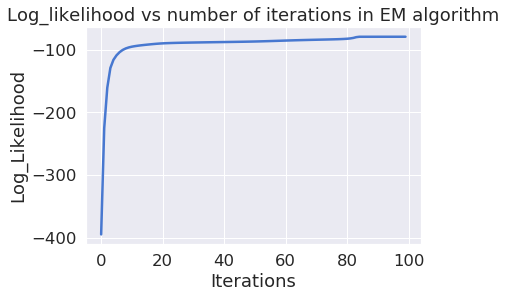

Final log likelihood = -79.1739369887032
iteration     |    0    |     LogLikelihood = 6.092121297194566
iteration     |    10    |     LogLikelihood = 79.57128493141668
iteration     |    20    |     LogLikelihood = 91.3244302794494
iteration     |    30    |     LogLikelihood = 99.9109635113901
iteration     |    40    |     LogLikelihood = 101.55518446106291
iteration     |    50    |     LogLikelihood = 102.31446374705523
iteration     |    60    |     LogLikelihood = 103.0674096436096
iteration     |    70    |     LogLikelihood = 103.97056960217219
iteration     |    80    |     LogLikelihood = 104.81153440380287
iteration     |    90    |     LogLikelihood = 105.39566913140843
EM completed


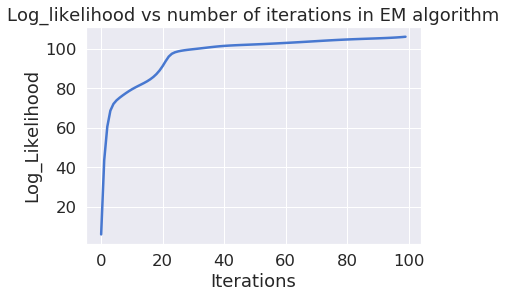

Final log likelihood = 106.36968334270534


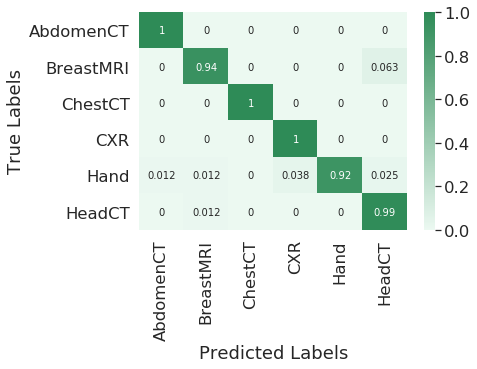

Macro F1 = 0.9733947810156476, Accuracy = 0.9723991507430998


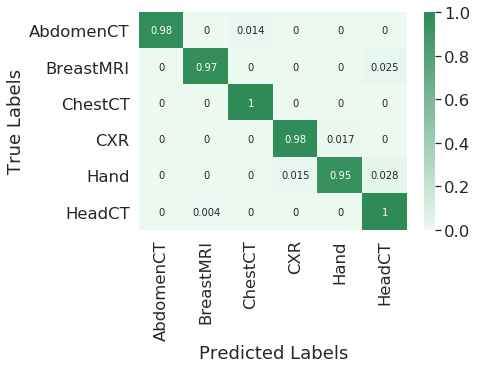

Macro F1 = 0.9821049984164927, Accuracy = 0.9825026511134677
iteration     |    0    |     LogLikelihood = 439.1187379190254
iteration     |    10    |     LogLikelihood = 582.8848888768975
iteration     |    20    |     LogLikelihood = 588.1095129446214
iteration     |    30    |     LogLikelihood = 591.018477412911
iteration     |    40    |     LogLikelihood = 593.2179632589322
iteration     |    50    |     LogLikelihood = 595.3135465769478
iteration     |    60    |     LogLikelihood = 598.5229716935099
iteration     |    70    |     LogLikelihood = 599.8691027867238
iteration     |    80    |     LogLikelihood = 600.4810858015007
iteration     |    90    |     LogLikelihood = 600.9657712097681
EM completed


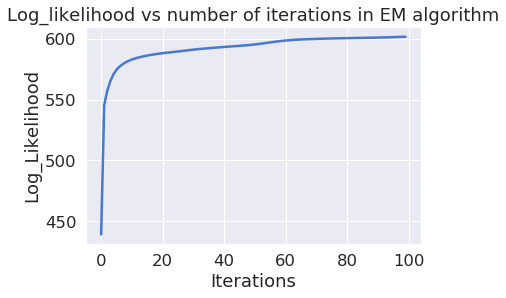

Final log likelihood = 601.7168033650053
iteration     |    0    |     LogLikelihood = -7.966288265605067
iteration     |    10    |     LogLikelihood = 123.42045427360713
iteration     |    20    |     LogLikelihood = 128.77431224387735
iteration     |    30    |     LogLikelihood = 138.97112855819367
iteration     |    40    |     LogLikelihood = 140.65422507600374
iteration     |    50    |     LogLikelihood = 142.96775492316283
iteration     |    60    |     LogLikelihood = 143.6534895117455
iteration     |    70    |     LogLikelihood = 144.19373444618302
iteration     |    80    |     LogLikelihood = 144.5661120929494
iteration     |    90    |     LogLikelihood = 144.78805326739126
EM completed


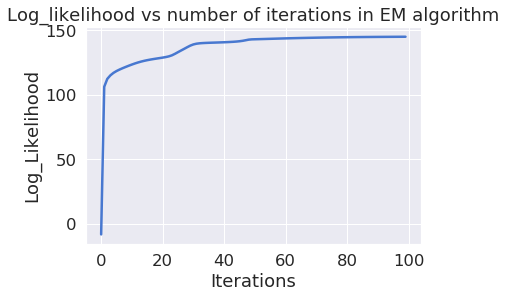

Final log likelihood = 144.93141633800624
iteration     |    0    |     LogLikelihood = 1207.4207276235645
iteration     |    10    |     LogLikelihood = 1316.221994098556
iteration     |    20    |     LogLikelihood = 1323.0994585363285
iteration     |    30    |     LogLikelihood = 1325.6849686781266
iteration     |    40    |     LogLikelihood = 1327.8060699871169
iteration     |    50    |     LogLikelihood = 1329.6932900411707
iteration     |    60    |     LogLikelihood = 1333.1448114726104
iteration     |    70    |     LogLikelihood = 1338.1560109119132
iteration     |    80    |     LogLikelihood = 1340.7214425623363
iteration     |    90    |     LogLikelihood = 1342.9931745110512
EM completed


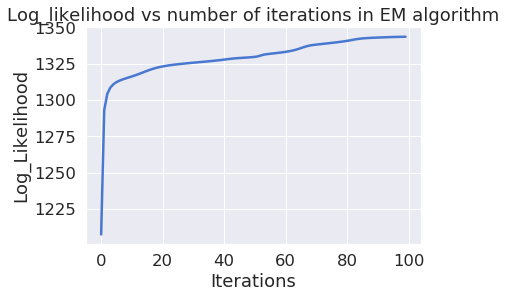

Final log likelihood = 1343.5848874174726
iteration     |    0    |     LogLikelihood = -367.9169811240879
iteration     |    10    |     LogLikelihood = -166.78484791885543
iteration     |    20    |     LogLikelihood = -157.09611965142676
iteration     |    30    |     LogLikelihood = -154.468036140208
iteration     |    40    |     LogLikelihood = -150.87469976198076
iteration     |    50    |     LogLikelihood = -148.03775619101575
iteration     |    60    |     LogLikelihood = -146.12799402564679
iteration     |    70    |     LogLikelihood = -145.60943943627046
iteration     |    80    |     LogLikelihood = -144.98393076471547
iteration     |    90    |     LogLikelihood = -143.99101590317647
EM completed


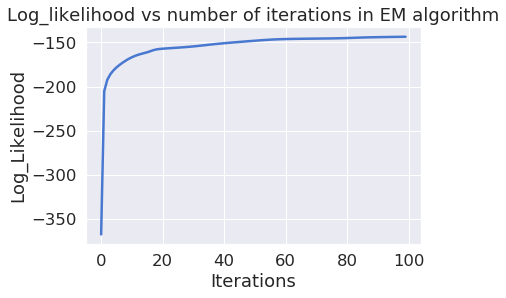

Final log likelihood = -143.4578600149243
iteration     |    0    |     LogLikelihood = -395.4100560153358
iteration     |    10    |     LogLikelihood = -80.97798003018814
iteration     |    20    |     LogLikelihood = -73.64392510968499
iteration     |    30    |     LogLikelihood = -71.3603258448509
iteration     |    40    |     LogLikelihood = -64.79403907200022
iteration     |    50    |     LogLikelihood = -64.3517707999812
iteration     |    60    |     LogLikelihood = -63.92771073921586
iteration     |    70    |     LogLikelihood = -59.63639643022299
iteration     |    80    |     LogLikelihood = -59.58471881982886
iteration     |    90    |     LogLikelihood = -59.563815555452784
EM completed


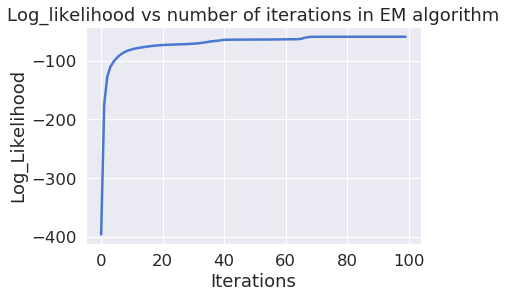

Final log likelihood = -59.550206350696214
iteration     |    0    |     LogLikelihood = -61.25507364438072
iteration     |    10    |     LogLikelihood = 84.42781052307764
iteration     |    20    |     LogLikelihood = 101.60866569842628
iteration     |    30    |     LogLikelihood = 106.327508627768
iteration     |    40    |     LogLikelihood = 107.86317863587773
iteration     |    50    |     LogLikelihood = 109.58327454301276
iteration     |    60    |     LogLikelihood = 113.06990563302742
iteration     |    70    |     LogLikelihood = 118.1498248004176
iteration     |    80    |     LogLikelihood = 121.53152540653362
iteration     |    90    |     LogLikelihood = 122.53863978406473
EM completed


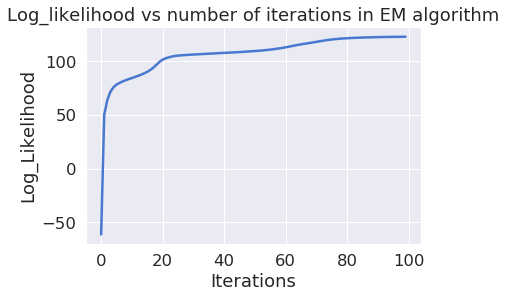

Final log likelihood = 122.93881722345645


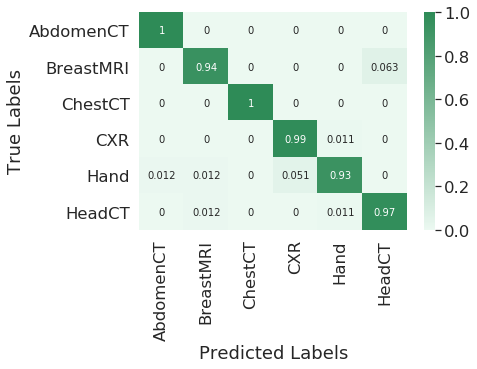

Macro F1 = 0.9713595072028283, Accuracy = 0.970276008492569


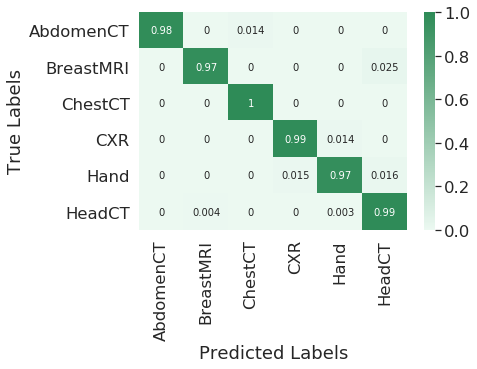

Macro F1 = 0.9842748043881099, Accuracy = 0.9846235418875928
iteration     |    0    |     LogLikelihood = 414.20202033515653
iteration     |    10    |     LogLikelihood = 579.1399598100201
iteration     |    20    |     LogLikelihood = 585.2218449949357
iteration     |    30    |     LogLikelihood = 590.6164906386904
iteration     |    40    |     LogLikelihood = 596.727299364302
iteration     |    50    |     LogLikelihood = 601.4075504380568
iteration     |    60    |     LogLikelihood = 604.784275895273
iteration     |    70    |     LogLikelihood = 607.9119350790988
iteration     |    80    |     LogLikelihood = 612.2912333561922
iteration     |    90    |     LogLikelihood = 614.4625102490696
EM completed


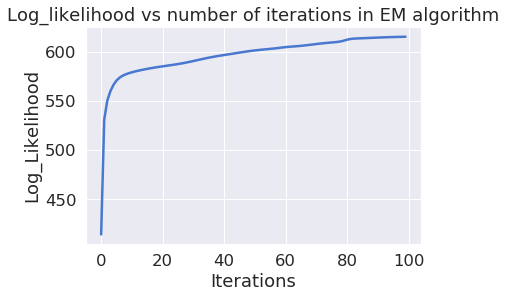

Final log likelihood = 615.3801097747086
iteration     |    0    |     LogLikelihood = -16.621018484031605
iteration     |    10    |     LogLikelihood = 131.84529319691833
iteration     |    20    |     LogLikelihood = 140.1452947740497
iteration     |    30    |     LogLikelihood = 142.04032898577572
iteration     |    40    |     LogLikelihood = 143.45131904925034
iteration     |    50    |     LogLikelihood = 144.5710405766037
iteration     |    60    |     LogLikelihood = 145.77637964194966
iteration     |    70    |     LogLikelihood = 148.65994506877033
iteration     |    80    |     LogLikelihood = 151.080256397536
iteration     |    90    |     LogLikelihood = 151.9647861770662
EM completed


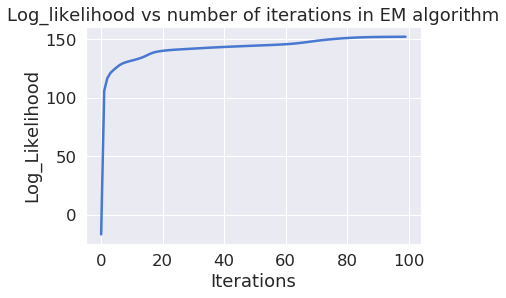

Final log likelihood = 152.18969239231964
iteration     |    0    |     LogLikelihood = 1187.0595212628182
iteration     |    10    |     LogLikelihood = 1317.244924020757
iteration     |    20    |     LogLikelihood = 1326.2926765054576
iteration     |    30    |     LogLikelihood = 1336.188216406984
iteration     |    40    |     LogLikelihood = 1346.2418580260266
iteration     |    50    |     LogLikelihood = 1351.8728403072728
iteration     |    60    |     LogLikelihood = 1352.8211301603997
iteration     |    70    |     LogLikelihood = 1353.2698721602599
iteration     |    80    |     LogLikelihood = 1354.0000879181837
iteration     |    90    |     LogLikelihood = 1355.3417432369743
EM completed


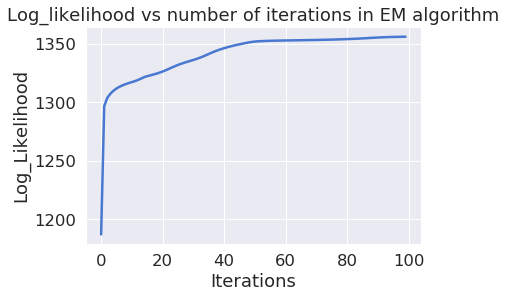

Final log likelihood = 1356.0367364118326
iteration     |    0    |     LogLikelihood = -328.62079244588176
iteration     |    10    |     LogLikelihood = -162.3395217935904
iteration     |    20    |     LogLikelihood = -151.91912369609383
iteration     |    30    |     LogLikelihood = -147.13294238803942
iteration     |    40    |     LogLikelihood = -144.0687597920399
iteration     |    50    |     LogLikelihood = -140.45072424922395
iteration     |    60    |     LogLikelihood = -138.63183342865364
iteration     |    70    |     LogLikelihood = -138.09507874362168
iteration     |    80    |     LogLikelihood = -137.71421240373394
iteration     |    90    |     LogLikelihood = -137.36905093848662
EM completed


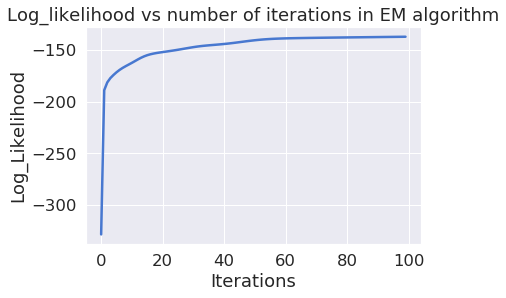

Final log likelihood = -137.01757597069556
iteration     |    0    |     LogLikelihood = -366.5318792283872
iteration     |    10    |     LogLikelihood = -82.39710105630952
iteration     |    20    |     LogLikelihood = -76.07443655350662
iteration     |    30    |     LogLikelihood = -73.30496988503502
iteration     |    40    |     LogLikelihood = -69.66435946549055
iteration     |    50    |     LogLikelihood = -66.58287725610683
iteration     |    60    |     LogLikelihood = -65.6576963234635
iteration     |    70    |     LogLikelihood = -63.39452250839975
iteration     |    80    |     LogLikelihood = -60.04970514417854
iteration     |    90    |     LogLikelihood = -59.326373856633566
EM completed


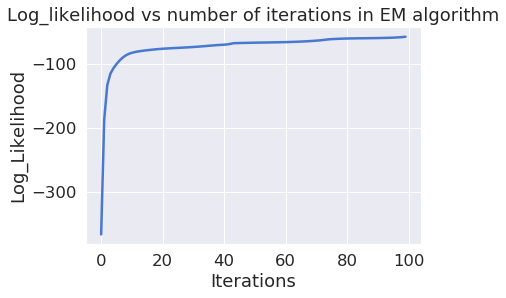

Final log likelihood = -56.590963374783996
iteration     |    0    |     LogLikelihood = -55.817507090171446
iteration     |    10    |     LogLikelihood = 100.98508704432643
iteration     |    20    |     LogLikelihood = 105.64098965354367
iteration     |    30    |     LogLikelihood = 109.19029844972356
iteration     |    40    |     LogLikelihood = 111.28329954272765
iteration     |    50    |     LogLikelihood = 114.97170061919145
iteration     |    60    |     LogLikelihood = 120.89830273517266
iteration     |    70    |     LogLikelihood = 122.907607612381
iteration     |    80    |     LogLikelihood = 126.87519748975402
iteration     |    90    |     LogLikelihood = 127.8041696329342
EM completed


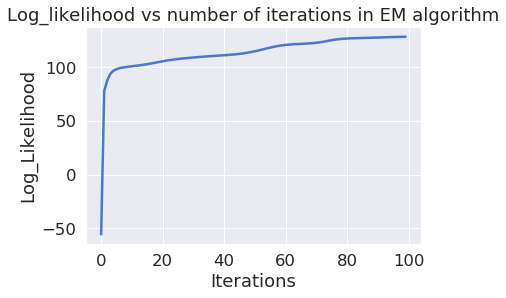

Final log likelihood = 128.59080314811786


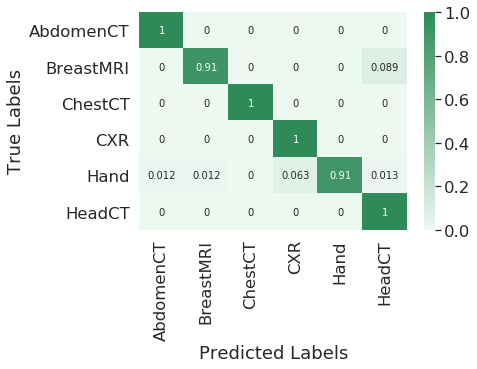

Macro F1 = 0.9692256837664289, Accuracy = 0.9681528662420382


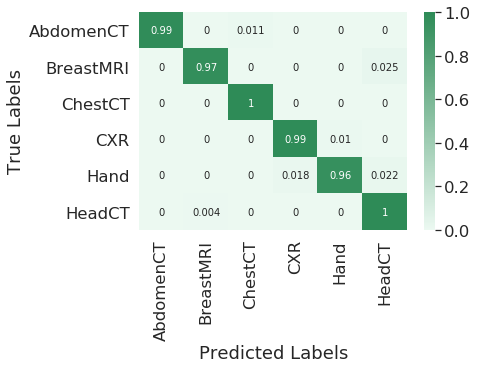

Macro F1 = 0.9842153179948606, Accuracy = 0.9846235418875928
iteration     |    0    |     LogLikelihood = 426.8092854112974
iteration     |    10    |     LogLikelihood = 582.0508057699797
iteration     |    20    |     LogLikelihood = 591.0518783333814
iteration     |    30    |     LogLikelihood = 599.2576474309263
iteration     |    40    |     LogLikelihood = 603.8588410919333
iteration     |    50    |     LogLikelihood = 608.4960449039629
iteration     |    60    |     LogLikelihood = 614.7199331544556
iteration     |    70    |     LogLikelihood = 619.5101387506704
iteration     |    80    |     LogLikelihood = 626.6164727445403
iteration     |    90    |     LogLikelihood = 633.8592614238623
EM completed


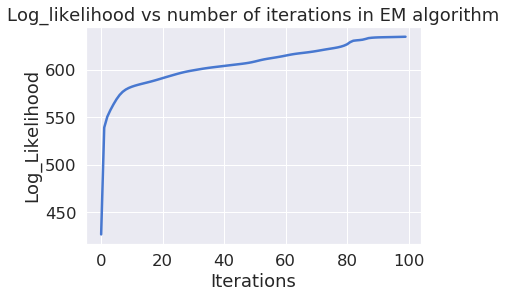

Final log likelihood = 634.644968403572
iteration     |    0    |     LogLikelihood = 15.803329332863104
iteration     |    10    |     LogLikelihood = 128.16222281588233
iteration     |    20    |     LogLikelihood = 139.3180147393019
iteration     |    30    |     LogLikelihood = 142.94748054066957
iteration     |    40    |     LogLikelihood = 146.16485423173694
iteration     |    50    |     LogLikelihood = 154.90292775100426


/home/harman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """
/home/harman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
/home/harman/anaconda3/lib/python3.7/site-packages/numpy/linalg/linalg.py:2116: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


iteration     |    60    |     LogLikelihood = nan
iteration     |    70    |     LogLikelihood = nan
iteration     |    80    |     LogLikelihood = nan
iteration     |    90    |     LogLikelihood = nan
EM completed


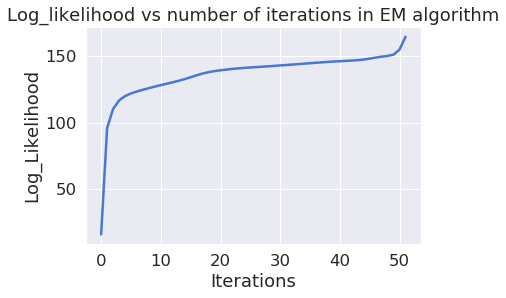

Final log likelihood = nan
iteration     |    0    |     LogLikelihood = 1125.3658320136387
iteration     |    10    |     LogLikelihood = 1323.0282721456385
iteration     |    20    |     LogLikelihood = 1333.660642122477
iteration     |    30    |     LogLikelihood = 1342.4698037021817
iteration     |    40    |     LogLikelihood = 1346.05732103716
iteration     |    50    |     LogLikelihood = 1348.9664073716237
iteration     |    60    |     LogLikelihood = 1354.2722664086928
iteration     |    70    |     LogLikelihood = 1357.45629359662
iteration     |    80    |     LogLikelihood = 1361.3440660079266
iteration     |    90    |     LogLikelihood = 1365.7809666470696
EM completed


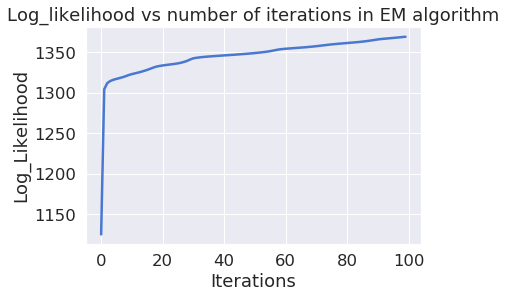

Final log likelihood = 1369.4473027248278
iteration     |    0    |     LogLikelihood = -357.9482245435281
iteration     |    10    |     LogLikelihood = -157.38053901798312
iteration     |    20    |     LogLikelihood = -151.42369306342985
iteration     |    30    |     LogLikelihood = -148.7989636572244
iteration     |    40    |     LogLikelihood = -143.85293416950825
iteration     |    50    |     LogLikelihood = -141.99689278538966
iteration     |    60    |     LogLikelihood = -140.9511560929751
iteration     |    70    |     LogLikelihood = -139.27271147536695
iteration     |    80    |     LogLikelihood = -135.09200898768202
iteration     |    90    |     LogLikelihood = -133.02668662610444
EM completed


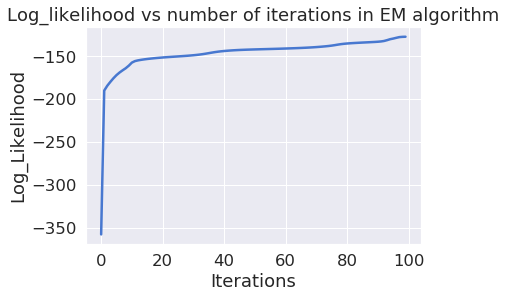

Final log likelihood = -127.11168693830186
iteration     |    0    |     LogLikelihood = -382.04855308575105
iteration     |    10    |     LogLikelihood = -81.66163958261168
iteration     |    20    |     LogLikelihood = -74.41338687657458
iteration     |    30    |     LogLikelihood = -69.35662010012739
iteration     |    40    |     LogLikelihood = -65.67942590194075
iteration     |    50    |     LogLikelihood = -64.36473336259985
iteration     |    60    |     LogLikelihood = -60.58639128958346


/home/harman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """
/home/harman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
/home/harman/anaconda3/lib/python3.7/site-packages/numpy/linalg/linalg.py:2116: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


iteration     |    70    |     LogLikelihood = nan
iteration     |    80    |     LogLikelihood = nan
iteration     |    90    |     LogLikelihood = nan
EM completed


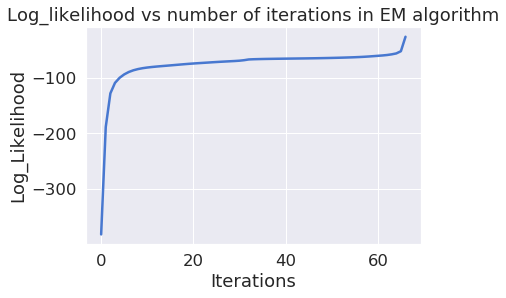

Final log likelihood = nan
iteration     |    0    |     LogLikelihood = -0.6912271011380825
iteration     |    10    |     LogLikelihood = 100.52420454552386
iteration     |    20    |     LogLikelihood = 105.96783468371953
iteration     |    30    |     LogLikelihood = 110.47244420688735
iteration     |    40    |     LogLikelihood = 116.27404050552796
iteration     |    50    |     LogLikelihood = 120.51742421336441
iteration     |    60    |     LogLikelihood = 123.48660965923544
iteration     |    70    |     LogLikelihood = 125.47561248414775
iteration     |    80    |     LogLikelihood = 127.24145348088403
iteration     |    90    |     LogLikelihood = 131.05966649642036
EM completed


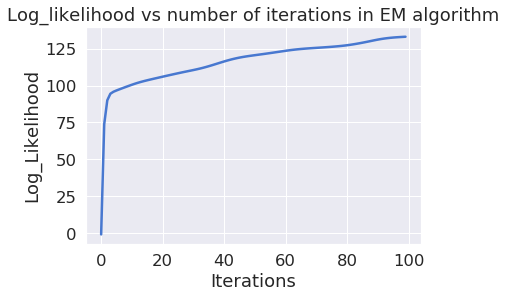

Final log likelihood = 133.10484523920968


/home/harman/anaconda3/lib/python3.7/site-packages/numpy/linalg/linalg.py:2116: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/home/harman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars


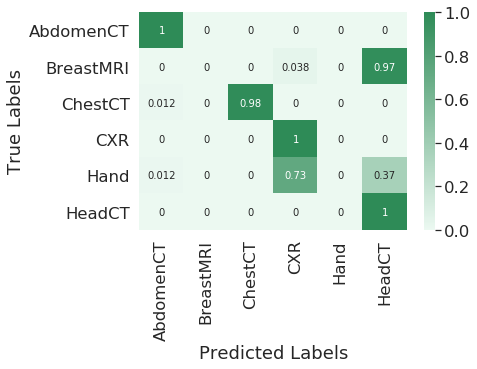

Macro F1 = 0.8249621046756547, Accuracy = 0.6411889596602972


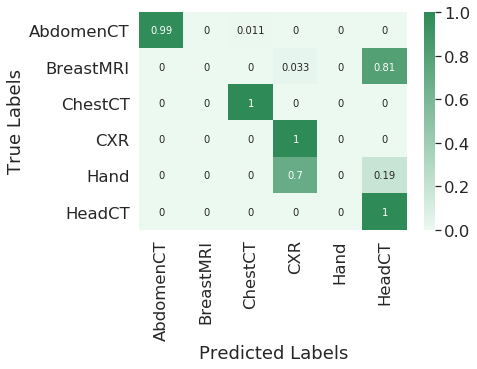

Macro F1 = 0.8466874648439077, Accuracy = 0.6998939554612937
iteration     |    0    |     LogLikelihood = 396.32478467434424
iteration     |    10    |     LogLikelihood = 581.3640189293847
iteration     |    20    |     LogLikelihood = 599.8425642569364
iteration     |    30    |     LogLikelihood = 606.1260098497928
iteration     |    40    |     LogLikelihood = 616.3584624471891
iteration     |    50    |     LogLikelihood = 626.1714779810578
iteration     |    60    |     LogLikelihood = 632.958691623945
iteration     |    70    |     LogLikelihood = 638.0144481637514
iteration     |    80    |     LogLikelihood = 640.883256803366
iteration     |    90    |     LogLikelihood = 643.3418702588783
EM completed


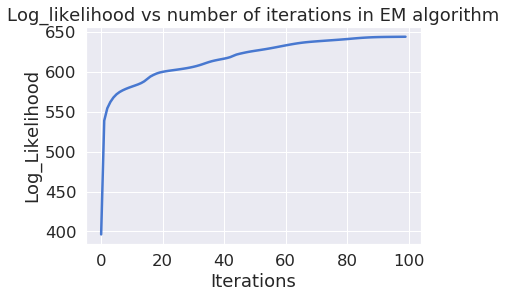

Final log likelihood = 643.8154516162213
iteration     |    0    |     LogLikelihood = 1.5830027639092203
iteration     |    10    |     LogLikelihood = 131.1811429099686
iteration     |    20    |     LogLikelihood = 143.5962063979102
iteration     |    30    |     LogLikelihood = 149.9118547499118
iteration     |    40    |     LogLikelihood = 154.34527843046206
iteration     |    50    |     LogLikelihood = 166.2689401445437


/home/harman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """
/home/harman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
/home/harman/anaconda3/lib/python3.7/site-packages/numpy/linalg/linalg.py:2116: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


iteration     |    60    |     LogLikelihood = nan
iteration     |    70    |     LogLikelihood = nan
iteration     |    80    |     LogLikelihood = nan
iteration     |    90    |     LogLikelihood = nan
EM completed


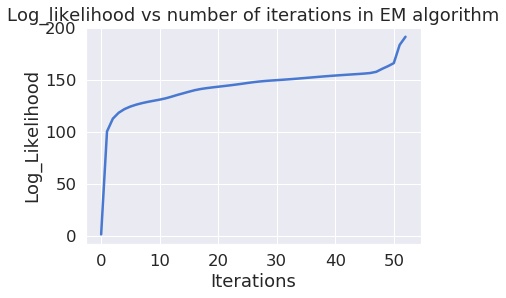

Final log likelihood = nan
iteration     |    0    |     LogLikelihood = 1164.7151799047194
iteration     |    10    |     LogLikelihood = 1319.1920076013362
iteration     |    20    |     LogLikelihood = 1330.3180237643346
iteration     |    30    |     LogLikelihood = 1338.0364847437183
iteration     |    40    |     LogLikelihood = 1347.2548863883835
iteration     |    50    |     LogLikelihood = 1355.690612122525
iteration     |    60    |     LogLikelihood = 1363.2034753214634
iteration     |    70    |     LogLikelihood = 1373.4482812538718
iteration     |    80    |     LogLikelihood = 1374.3050840281965
iteration     |    90    |     LogLikelihood = 1375.1634875592545
EM completed


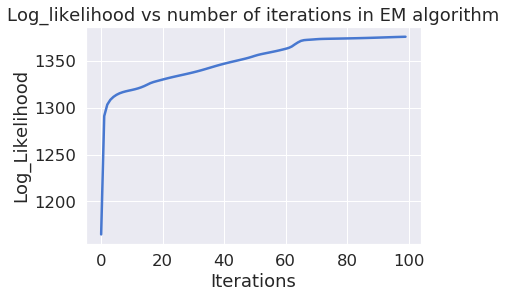

Final log likelihood = 1376.1943238160297
iteration     |    0    |     LogLikelihood = -383.55892132578197
iteration     |    10    |     LogLikelihood = -169.65850914201897
iteration     |    20    |     LogLikelihood = -155.90362568042426
iteration     |    30    |     LogLikelihood = -146.80509912548462
iteration     |    40    |     LogLikelihood = -141.27396110374164
iteration     |    50    |     LogLikelihood = -135.90369006290382
iteration     |    60    |     LogLikelihood = -131.88767594153845
iteration     |    70    |     LogLikelihood = -127.38311470978526
iteration     |    80    |     LogLikelihood = -118.00669168014987
iteration     |    90    |     LogLikelihood = -100.93310665794394
EM completed


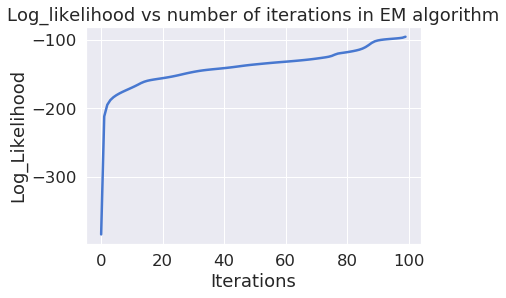

Final log likelihood = -93.06193834564134
iteration     |    0    |     LogLikelihood = -327.40457641190125
iteration     |    10    |     LogLikelihood = -80.45986045839993
iteration     |    20    |     LogLikelihood = -72.84875792263979
iteration     |    30    |     LogLikelihood = -67.5672292178666
iteration     |    40    |     LogLikelihood = -64.53113000754051
iteration     |    50    |     LogLikelihood = -61.863074493648256
iteration     |    60    |     LogLikelihood = -59.119337776137876
iteration     |    70    |     LogLikelihood = -55.85995900752533
iteration     |    80    |     LogLikelihood = -48.768285255645836
iteration     |    90    |     LogLikelihood = -45.61505297323347
EM completed


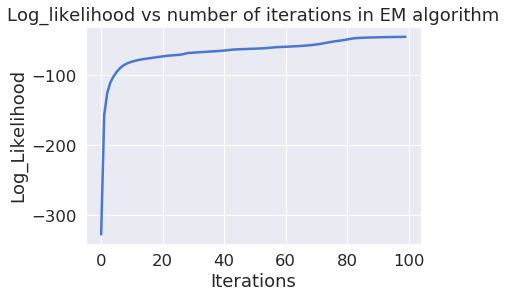

Final log likelihood = -44.56295037657402
iteration     |    0    |     LogLikelihood = -78.35013214585649
iteration     |    10    |     LogLikelihood = 104.59285765959469
iteration     |    20    |     LogLikelihood = 114.36166161602999
iteration     |    30    |     LogLikelihood = 123.4007895941731
iteration     |    40    |     LogLikelihood = 130.19912912726102
iteration     |    50    |     LogLikelihood = 133.2513021878284
iteration     |    60    |     LogLikelihood = 135.53847538279643
iteration     |    70    |     LogLikelihood = 137.11170487208508
iteration     |    80    |     LogLikelihood = 138.2515290984546
iteration     |    90    |     LogLikelihood = 139.34276883328516
EM completed


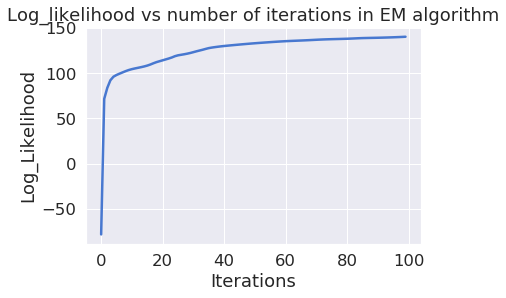

Final log likelihood = 140.6794646924684


/home/harman/anaconda3/lib/python3.7/site-packages/numpy/linalg/linalg.py:2116: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/home/harman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars


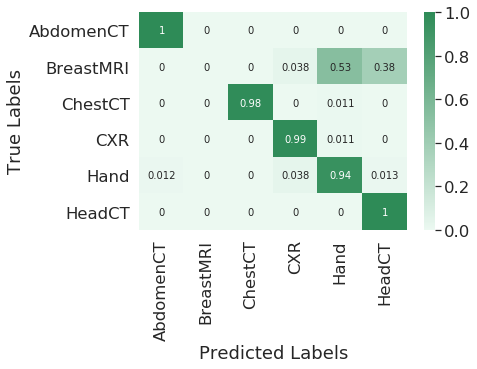

Macro F1 = 0.9067232774278994, Accuracy = 0.8152866242038217


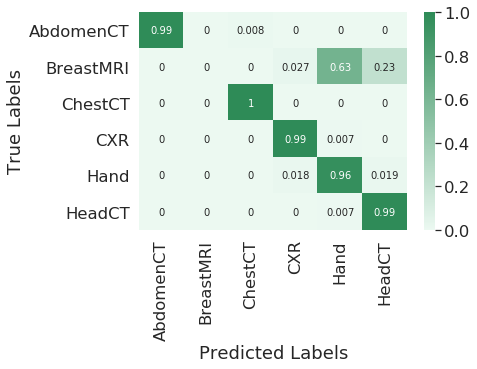

Macro F1 = 0.9181015642870275, Accuracy = 0.848356309650053


In [401]:
train_acc_list = []
test_acc_list = []
for num_gaussians in [1, 2, 3, 5, 8 ,10, 14 ,15]:
    gmm_params = get_gmm_params(X_train_gmm, y_train_gmm, num_gauss = num_gaussians, iter_max = 100, stop_thresh = 0.0001)
    priors = priors_naive = getpriors(y_train_gmm)
    
    # for test data
    y_pred_test_gmm = prediction_gmm(X_test_gmm, priors, gmm_params, num_gaussians)
    conf_mat_norm_gmm, stats_df_norm_gmm, macroF1_norm_gmm, accuracy_norm_gmm = performance_metrics_multiclass(y_pred_test_gmm, y_test_gmm, numcat)
    print('Macro F1 = {}, Accuracy = {}'.format(macroF1_norm_gmm, accuracy_norm_gmm))
    stats_df_norm_gmm
    test_acc_list.append(accuracy_norm_gmm)
    
    # for train data - 
    y_pred_train_gmm = prediction_gmm(X_train_gmm, priors, gmm_params, num_gaussians)
    conf_mat_norm_gmm, stats_df_norm_gmm, macroF1_norm_gmm, accuracy_norm_gmm = performance_metrics_multiclass(y_pred_train_gmm, y_train_gmm, numcat)
    print('Macro F1 = {}, Accuracy = {}'.format(macroF1_norm_gmm, accuracy_norm_gmm))
    stats_df_norm_gmm    
    train_acc_list.append(accuracy_norm_gmm)

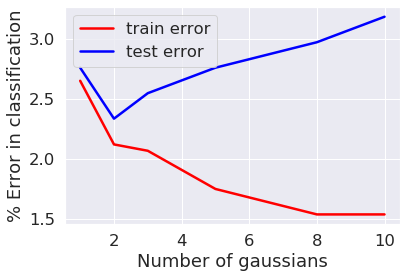

In [413]:
train_error = 1 - np.array(train_acc_list)
test_error = 1 - np.array(test_acc_list)
number_of_gaussians = [1, 2, 3, 5, 8, 10]
plt.plot(number_of_gaussians, train_error[:-2]*100, label = 'train error', color = 'r')
plt.plot(number_of_gaussians, test_error[:-2]*100, label = 'test error', color = 'b')
plt.xlabel('Number of gaussians')
plt.ylabel('% Error in classification')
plt.legend()

From the abouve plot we see that for the Bayes classifier, it is best to use 2 gaussians in GMM. Hence we find the statistics of the model using 2 gaussians.We test the model on a different test set to quantify the results.

iteration     |    0    |     LogLikelihood = 400.0279404986128
iteration     |    10    |     LogLikelihood = 540.0091656044015
iteration     |    20    |     LogLikelihood = 540.1184585527548
iteration     |    30    |     LogLikelihood = 540.1519496252774
iteration     |    40    |     LogLikelihood = 540.1630782403397
iteration     |    50    |     LogLikelihood = 540.1665826753183
EM completed


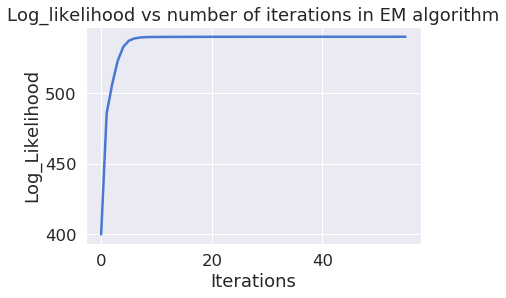

Final log likelihood = 540.1672732817591
iteration     |    0    |     LogLikelihood = -22.110065083332326
iteration     |    10    |     LogLikelihood = 103.21092689681808
iteration     |    20    |     LogLikelihood = 106.55282322533114
iteration     |    30    |     LogLikelihood = 106.91487138759702
iteration     |    40    |     LogLikelihood = 106.95213821331028
iteration     |    50    |     LogLikelihood = 106.95608619327739
EM completed


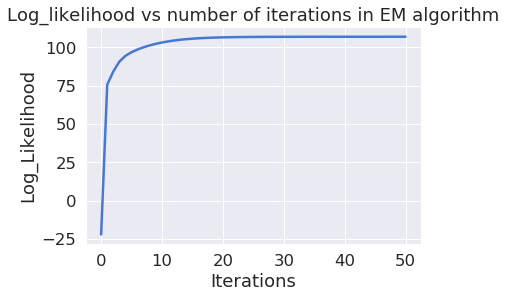

Final log likelihood = 106.95608619327739
iteration     |    0    |     LogLikelihood = 1082.8529267837714
iteration     |    10    |     LogLikelihood = 1293.6383641692832
iteration     |    20    |     LogLikelihood = 1297.0527842471063
iteration     |    30    |     LogLikelihood = 1297.7786761443274
iteration     |    40    |     LogLikelihood = 1297.950440022172
iteration     |    50    |     LogLikelihood = 1297.9948191141164
iteration     |    60    |     LogLikelihood = 1298.0064204393836
iteration     |    70    |     LogLikelihood = 1298.0094482850714
EM completed


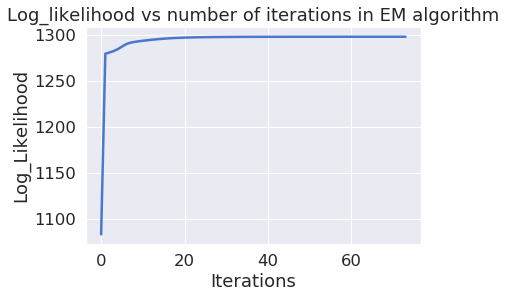

Final log likelihood = 1298.0098022299487
iteration     |    0    |     LogLikelihood = -383.8360818678016
iteration     |    10    |     LogLikelihood = -215.08120886976602
iteration     |    20    |     LogLikelihood = -208.30447846847642
iteration     |    30    |     LogLikelihood = -206.65564292364317
iteration     |    40    |     LogLikelihood = -206.22881163391727
iteration     |    50    |     LogLikelihood = -206.17403243789047
EM completed


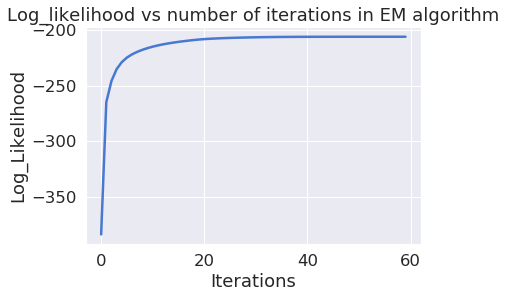

Final log likelihood = -206.16990845167743
iteration     |    0    |     LogLikelihood = -370.4807204261735
iteration     |    10    |     LogLikelihood = -131.78527531708934
EM completed


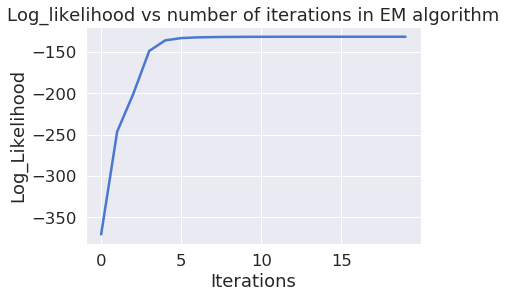

Final log likelihood = -131.72655469320867
iteration     |    0    |     LogLikelihood = -128.78559704154648
iteration     |    10    |     LogLikelihood = 65.28588348045437
iteration     |    20    |     LogLikelihood = 67.1349355864642
iteration     |    30    |     LogLikelihood = 67.50118599362708
iteration     |    40    |     LogLikelihood = 68.29864867060792
iteration     |    50    |     LogLikelihood = 85.9540204125935
iteration     |    60    |     LogLikelihood = 88.04947898449304
EM completed


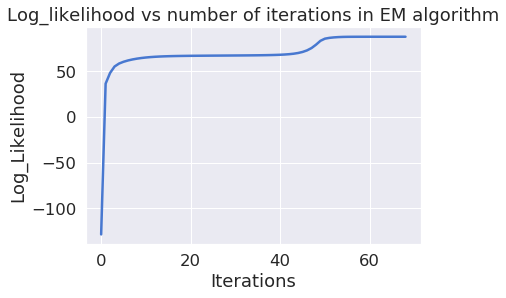

Final log likelihood = 88.05663556561024


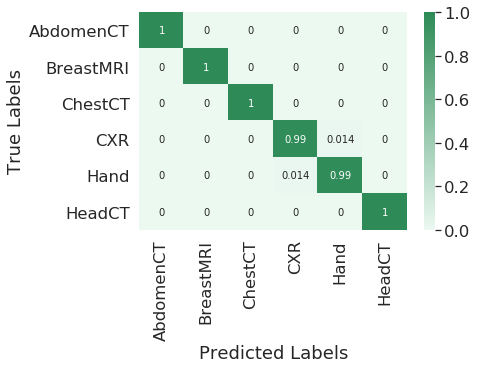

Macro F1 = 0.9953377673448096, Accuracy = 0.9957627118644068


,class,Precision,Recall,F1
0,AbdomenCT,1.000000,1.000000,1.000000
1,BreastMRI,1.000000,1.000000,1.000000
2,ChestCT,1.000000,1.000000,1.000000
3,CXR,0.986111,0.986111,0.986111
4,Hand,0.985915,0.985915,0.985915
5,HeadCT,1.000000,1.000000,1.000000


In [415]:
X_Fintest_gmm = X_test_pca[X_test_pca.shape[0]//n:2*X_test_pca.shape[0]//n]
y_Fintest_gmm = y_test[X_test_pca.shape[0]//n:2*X_test_pca.shape[0]//n]
gmm_params = get_gmm_params(X_train_gmm, y_train_gmm, num_gauss = 2, iter_max = 100, stop_thresh = 0.0001)
priors = priors_naive = getpriors(y_train_gmm)
y_pred_Fintest_gmm = prediction_gmm(X_Fintest_gmm, priors, gmm_params, num_gauss = 2)
conf_mat_norm_gmm, stats_df_norm_gmm, macroF1_norm_gmm, accuracy_norm_gmm = performance_metrics_multiclass(y_pred_Fintest_gmm, y_Fintest_gmm, numcat)
print('Macro F1 = {}, Accuracy = {}'.format(macroF1_norm_gmm, accuracy_norm_gmm))
stats_df_norm_gmm

iteration     |    0    |     LogLikelihood = 418.25003544151184
iteration     |    10    |     LogLikelihood = 530.5522011441708
iteration     |    20    |     LogLikelihood = 530.7127793257118
iteration     |    30    |     LogLikelihood = 530.7637097729181
iteration     |    40    |     LogLikelihood = 530.793740599023
iteration     |    50    |     LogLikelihood = 530.815538945651
iteration     |    60    |     LogLikelihood = 530.8347172632891
iteration     |    70    |     LogLikelihood = 530.8561947379612
iteration     |    80    |     LogLikelihood = 530.8888252354326
iteration     |    90    |     LogLikelihood = 530.9629295186614
EM completed


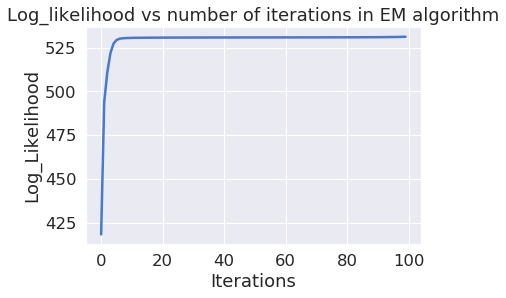

Final log likelihood = 531.2689997832719
iteration     |    0    |     LogLikelihood = 41.892424970330275
iteration     |    10    |     LogLikelihood = 82.18189010859653
iteration     |    20    |     LogLikelihood = 82.77975045733962
iteration     |    30    |     LogLikelihood = 83.13451486212887
iteration     |    40    |     LogLikelihood = 83.34996595363722
iteration     |    50    |     LogLikelihood = 83.48054765555618
iteration     |    60    |     LogLikelihood = 83.55928190483644
iteration     |    70    |     LogLikelihood = 83.60652024944828
iteration     |    80    |     LogLikelihood = 83.63474370001671
iteration     |    90    |     LogLikelihood = 83.65154661843147
EM completed


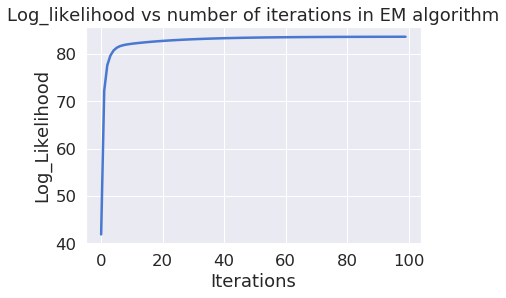

Final log likelihood = 83.66151972424112
iteration     |    0    |     LogLikelihood = 1205.5817576566599
iteration     |    10    |     LogLikelihood = 1297.854523121912
iteration     |    20    |     LogLikelihood = 1297.9788742215449
iteration     |    30    |     LogLikelihood = 1298.0025015572342
iteration     |    40    |     LogLikelihood = 1298.0084575765422
EM completed


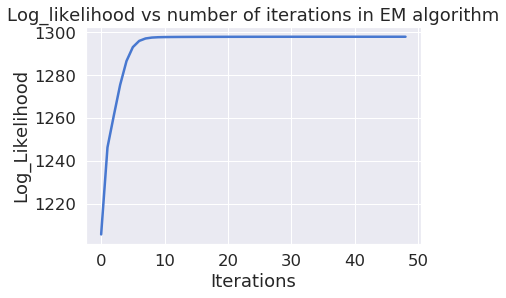

Final log likelihood = 1298.0098177398681
iteration     |    0    |     LogLikelihood = -392.69716271499266
iteration     |    10    |     LogLikelihood = -216.6557021524202
iteration     |    20    |     LogLikelihood = -208.7541038003833
iteration     |    30    |     LogLikelihood = -206.75344708095605
iteration     |    40    |     LogLikelihood = -206.24648344389382
iteration     |    50    |     LogLikelihood = -206.1755481768406
iteration     |    60    |     LogLikelihood = -206.1699182382098
EM completed


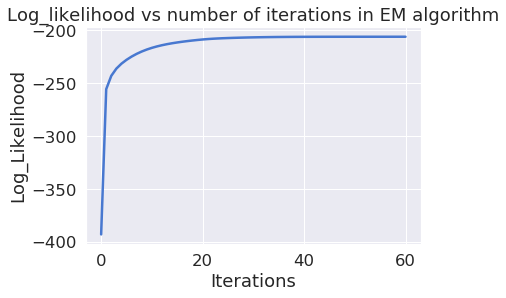

Final log likelihood = -206.1699182382098
iteration     |    0    |     LogLikelihood = -406.20628492878694
iteration     |    10    |     LogLikelihood = -131.75789908906663
EM completed


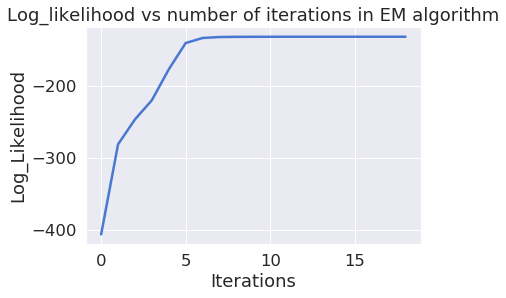

Final log likelihood = -131.72655692160097
iteration     |    0    |     LogLikelihood = -13.996815635885522
iteration     |    10    |     LogLikelihood = 64.31410602537406
iteration     |    20    |     LogLikelihood = 74.53810887609148
iteration     |    30    |     LogLikelihood = 86.20598740397641
iteration     |    40    |     LogLikelihood = 86.4300338960639
iteration     |    50    |     LogLikelihood = 86.43810297473625
EM completed


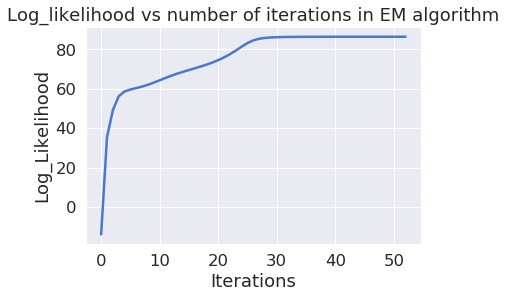

Final log likelihood = 86.43835380903406


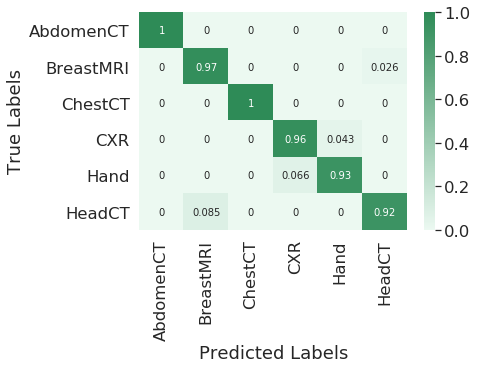

Macro F1 = 0.963658846612986, Accuracy = 0.9660297239915074


,class,Precision,Recall,F1
0,AbdomenCT,1.000000,1.000000,1.000000
1,BreastMRI,0.920000,0.971831,0.945205
2,ChestCT,1.000000,1.000000,1.000000
3,CXR,0.935897,0.960526,0.948052
4,Hand,0.955882,0.928571,0.942029
5,HeadCT,0.972603,0.922078,0.946667


In [417]:
X_Fintest_gmm = X_test_pca[2*X_test_pca.shape[0]//n:3*X_test_pca.shape[0]//n]
y_Fintest_gmm = y_test[2*X_test_pca.shape[0]//n:3*X_test_pca.shape[0]//n]
gmm_params = get_gmm_params(X_train_gmm, y_train_gmm, num_gauss = 2, iter_max = 100, stop_thresh = 0.0001)
priors = priors_naive = getpriors(y_train_gmm)
y_pred_Fintest_gmm = prediction_gmm(X_Fintest_gmm, priors, gmm_params, num_gauss = 2)
conf_mat_norm_gmm, stats_df_norm_gmm, macroF1_norm_gmm, accuracy_norm_gmm = performance_metrics_multiclass(y_pred_Fintest_gmm, y_Fintest_gmm, numcat)
print('Macro F1 = {}, Accuracy = {}'.format(macroF1_norm_gmm, accuracy_norm_gmm))
stats_df_norm_gmm

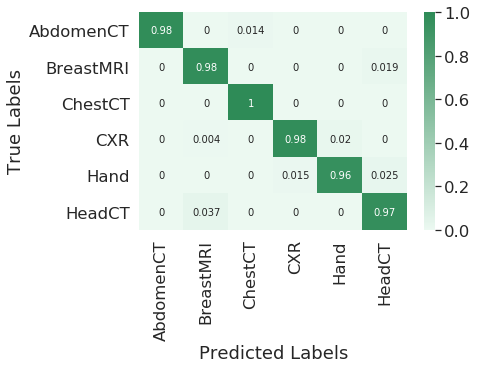

Macro F1 = 0.9775487533470271, Accuracy = 0.9782608695652174


,class,Precision,Recall,F1
0,AbdomenCT,1.000000,0.984326,0.992101
1,BreastMRI,0.959559,0.977528,0.968460
2,ChestCT,0.986034,1.000000,0.992968
3,CXR,0.985030,0.979167,0.982090
4,Hand,0.979167,0.955932,0.967410
5,HeadCT,0.956250,0.968354,0.962264


In [418]:
## train data stats
y_pred_train_gmm = prediction_gmm(X_train_gmm, priors, gmm_params, num_gauss = 2)
conf_mat_norm_gmm, stats_df_norm_gmm, macroF1_norm_gmm, accuracy_norm_gmm = performance_metrics_multiclass(y_pred_train_gmm, y_train_gmm, numcat)
print('Macro F1 = {}, Accuracy = {}'.format(macroF1_norm_gmm, accuracy_norm_gmm))
stats_df_norm_gmm

# Parzen
### Window functions - hypercube, gaussian kernel

In [490]:
n = 20
X_train_parzen = X_train_pca[0:X_train_pca.shape[0]//n]
y_train_parzen = y_train[0:X_train_pca.shape[0]//n]
X_test_parzen = X_test_pca[0:X_test_pca.shape[0]//n]
y_test_parzen = y_test[0:X_test_pca.shape[0]//n]

In [507]:
def unit_hypercube(x, X_train, h):
    '''x is a 1d vector'''
    u = (x.reshape(1, X_train.shape[1]) - X_train)/h
#     print(u)
    assert(u.shape == X_train.shape)
    u_mod = np.absolute(u)
    u_mod_poswindow = np.all((u_mod<=1/2), axis = 1)
    assert(u_mod_poswindow.shape == (X_train.shape[0],))
    
    prob = (1/X_train.shape[0]) * (1/(h**(X_train.shape[1]))) * np.sum(u_mod_poswindow)
#     print(prob)
    return prob
    
def gauss_ker_apply(u):
    '''u is a 1d array'''
    return np.exp(-0.5 * ((np.linalg.norm(u))**2))
    
def gaussian_kernel(x, X_train, h):
    '''x is a 1d vector'''
    n, d = X_train.shape
    u = (x.reshape(1, X_train.shape[1]) - X_train)/(h/np.sqrt(n))
    assert(u.shape == X_train.shape)
    kernel_applied = np.apply_along_axis(gauss_ker_apply, 1, u)
    
    prob = (1/((h*np.sqrt(2*np.pi * n))**(d))) * np.sum(kernel_applied)
    return prob

    return 1/(np.sqrt(2*np.pi))*np.exp(-1 * np.linalg.norm(x))
    
def likelihood_parzen(x, X_train, windowfn, h):
    if(windowfn == 'hypercube'):
        return unit_hypercube(x, X_train, h)
    else:
        return gaussian_kernel(x, X_train, h)
    
def parzen_classify(h, X_train, y_train, X_test, priors, windowfn):
    y_pred_test = np.zeros((X_test.shape[0],))
    for i in range(X_test.shape[0]):
        maxpost = 0
        for j in range(numcat):
            lik = likelihood_parzen(X_test[i], X_train[np.where(y_train==j)], windowfn, h)
            post_j = priors[j]*lik
            if(post_j>maxpost):
                maxpost = post_j
                y_pred_test[i] = j
      
    return y_pred_test


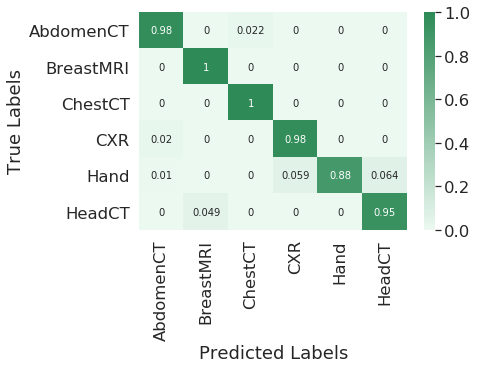

Macro F1 = 0.9627598126466347, Accuracy = 0.9626485568760611


,class,Precision,Recall,F1
0,AbdomenCT,0.969697,0.979592,0.974619
1,BreastMRI,0.953271,1.000000,0.976077
2,ChestCT,0.978022,1.000000,0.988889
3,CXR,0.942857,0.980198,0.961165
4,Hand,1.000000,0.876190,0.934010
5,HeadCT,0.936842,0.946809,0.941799


In [510]:
h = 0.5
priors_parzen = getpriors(y_train_parzen)
y_pred_test_parzen = parzen_classify(h, X_train_parzen, y_train_parzen, X_test_parzen, priors_parzen, 'hypercube')
conf_mat_norm_parzen, stats_df_norm_parzen, macroF1_norm_parzen, accuracy_norm_parzen = performance_metrics_multiclass(y_pred_test_parzen, y_test_parzen, numcat)
print('Macro F1 = {}, Accuracy = {}'.format(macroF1_norm_parzen, accuracy_norm_parzen))
stats_df_norm_parzen

### Parzen Window experiments

# KNN

In [566]:
def get_dist(x1, X):
    
    return np.linalg.norm((x1.reshape(1, X.shape[1])-X), axis = 1)

    
def knn_classify(k, X_train, y_train, X_test, priors):
    y_pred_test = np.zeros((X_test.shape[0],))
    for i in range(X_test.shape[0]):
        dist = get_dist(X_test[i], X_train)
        assert(dist.shape == (X_train.shape[0],))
        argsort_dist = np.argsort(dist, axis = 0)
        y_train_sorted_firstk = y_train[argsort_dist][0:k]
        y_unique, counts = np.unique(y_train_sorted_firstk, return_counts=True)
#         print(counts.shape, np.array(priors).shape)
#         print(counts)
#         print(y_unique)
#         assert(counts.shape==np.array(priors).shape==(numcat,))
        post = np.ones(counts.shape[0])
        maxpost = 0
        for j in range(counts.shape[0]):
            post[j] *= priors[y_unique[j]] * counts[j]
            if(post[j] >= maxpost):
                maxpost = post[j]
                y_pred_test[i] = y_unique[j]
        
    return y_pred_test

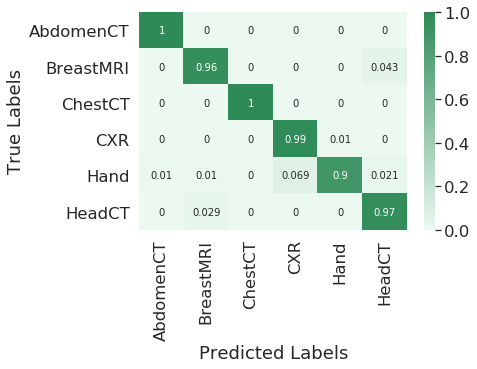

Macro F1 = 0.9683543690473009, Accuracy = 0.967741935483871


,class,Precision,Recall,F1
0,AbdomenCT,0.969697,0.979592,0.974619
1,BreastMRI,0.953271,1.000000,0.976077
2,ChestCT,0.978022,1.000000,0.988889
3,CXR,0.942857,0.980198,0.961165
4,Hand,1.000000,0.876190,0.934010
5,HeadCT,0.936842,0.946809,0.941799


In [567]:
k = 3
priors_knn = getpriors(y_train_parzen)
y_pred_test_knn = knn_classify(k, X_train_parzen, y_train_parzen, X_test_parzen, priors_knn)
conf_mat_norm_knn, stats_df_norm_knn, macroF1_norm_knn, accuracy_norm_knn = performance_metrics_multiclass(y_pred_test_knn, y_test_parzen, numcat)
print('Macro F1 = {}, Accuracy = {}'.format(macroF1_norm_knn, accuracy_norm_knn))
stats_df_norm_parzen

# Linear Models
### Logistic classifier, Linear(?) classifier - L2,L1,Elastic Net
### GLM ie Logistic with sigma(phi(W.TX))- Different Kernels, L2,L1, Elastic